<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Метрики-и-распределения-данных" data-toc-modified-id="Метрики-и-распределения-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Метрики и распределения данных</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Анализ-метрик-в-разрезе-продуктов" data-toc-modified-id="Анализ-метрик-в-разрезе-продуктов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ метрик в разрезе продуктов</a></span></li><li><span><a href="#Отток.-Портрет-клиента" data-toc-modified-id="Отток.-Портрет-клиента-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Отток. Портрет клиента</a></span></li></ul></li><li><span><a href="#Статистический-анализ-по-оттоку" data-toc-modified-id="Статистический-анализ-по-оттоку-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Статистический анализ по оттоку</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-равенстве-дохода" data-toc-modified-id="Гипотеза-о-равенстве-дохода-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза о равенстве дохода</a></span></li><li><span><a href="#Гипотеза-о-равенстве-возраста" data-toc-modified-id="Гипотеза-о-равенстве-возраста-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза о равенстве возраста</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Кластеризация</a></span></li><li><span><a href="#Сегментация" data-toc-modified-id="Сегментация-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Сегментация</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

<big style="font-size: 150%;"><b>Анализ причин оттока и сегментация клиентов  банка "МетанПром"</b> </big>

<b> Презентация: </b>  https://disk.yandex.ru/i/9xDp32w7cQzDCw

# Описание проекта

Проведение данного исследования необходимо коллегам из отдела маркетинга, для определения причин оттока клиентов и составления стратегии по их удержанию. Для достижения целей и помощи коллегам нам предстоит провести исследовательский и статистический анализ данных, сегментировать клиентов и на основании этого сформулировать предложения, которые помогут сократить отток и лучше понимать потребности клиентов.

# Описание данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.



In [1]:
# здесь сразу импортируем все библиотеки, которые потребуются в работе
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from plotly import graph_objects as go

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

import statistics as stat

from scipy.cluster.hierarchy import dendrogram, linkage 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from IPython.display import Image
from sklearn.tree import plot_tree

import phik
from phik.report import plot_correlation_matrix
from phik import report

#import numba
#import click

In [2]:
# считаем данные и посмотрим первые строки DataFram-a

try:
    df = pd.read_csv('bank_dataset.csv')
except:
    df = pd.read_csv('/datasets/bank_dataset.csv')
    
df.head()    

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# параметры формата
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
print(1 - df['Balance'].count()/df.shape[0])

0.3617


In [6]:
# проверка на наличие явных дубликатов
df.duplicated().sum()

0

Имеем таблицу, содержащую 10 тысяч строк. 
* в целом типы данных соответсвуют по смыслу, содержащейся в ячейках информации, однако для столбцов `CreditCard`, `Loyalty`, `Churn` больше подходит тип данных `boolean`;
* имена столбцов необходимо привести к единому виду для удобства;
* явных дубликатов нет;
* столбец ` userid` не несет для нашего исследования важной информации и будет мешать;
* для столбцов `gender` и `city` с категориальными строковыми значениями добавим числовые кодирующие столбцы, для удобства дальнейшего анализа;
* имеем достаточно большое количество пропусков в столбце `Balance` около 36% от общего числа записей.



Рассмотрим проблемный столбец `Balance` более подробно

In [7]:
#  посмотрим детальнее на столбец Balance
df['Balance'].describe().to_frame()

,Balance
count,6383.00
mean,119827.49
std,30095.06
min,3768.69
25%,100181.98
50%,119839.69
75%,139512.29
max,250898.09


Разброс по балансу составляет от 3 768 до 250 898. При этом нет нулевых балансов.

Принимая во внимание предметную область, можно предположить, две причины возникновения пропусков
* технический сбой / отсутствие прав на доступ к таблице с балансом при выгрузке;
* нулевой баланс

В первом случае нам нечем заполнить пропуски, медианные и средние значения для клиентов с аналогичными социально-демографическими чертами не будут релевантны.

С другой стороны сложно представить, что в выборке из 10 тысяч клиентов нет людей с нулевым балансом, т.к. причин его возникновения может быть масса, например:
* кредитная карта / счет могут закрываться в течении 40-60 дней, при этом баланс должен быть нулевым для корректного закрытия;
* дебетовые продукты / зарплатные по которым у клиента закончились деньги / он их перевел куда - то.

Второе предположение кажется мне более правдоподобным, хотя и вероятность сбоя исключать нельзя.
Поскольку избавиться от строк с пропусками мы не можем, ввиду их большого числа, поэтому попробуем заменить пропущенные значения нулями.

`Вывод`

На данном шаге познакомились с представленными данными. 
Сформулируем финальный список задач по предобработке.
* `CreditCard`, `Loyalty`, `Churn` - привести к типу `boolean`;
*  имена столбцов привести к нижнему регистру;
* избавиться от столбца `userid`;
* провести кодирование столбцов с категориальными переменными;
* заменить пропуски в столбце `Balance` нулями.

Переходим к следующему шагу.

# Предобработка

Проводим предобработку по списку определенному на шаге 2.

In [8]:
# приведоим строки к нижнему регистру
df.columns = df.columns.str.lower()
# убираем столбец userid
df = df.drop('userid', axis=1)
#  заменяем пропуски нулями
df = df.fillna(0)

Построим матрицу корреляций `phic` с балансом и категориальными переменными.

In [9]:
cols_to_keep = ["balance", "city", "gender", "churn", "products", "loyalty", "creditcard"]     
df_phic = df[cols_to_keep]
phik_overview = df_phic.phik_matrix()
phik_overview.round(2).head(1)

interval columns not set, guessing: ['balance', 'churn', 'products', 'loyalty', 'creditcard']


,balance,city,gender,churn,products,loyalty,creditcard
balance,1.00,0.46,0.00,0.18,0.37,0.02,0.05


Баланс сильнее всего коррелирует с городом и количеством продуктов. Далее посмотрим какова доля пропущеных значений баланса в каждой из категорий (город, продукты)

In [10]:
display (df.query("balance == 0").groupby('city')['balance'].count()/df.groupby('city')['age'].count())
display (df.query("balance == 0").groupby('products')['balance'].count()/df.groupby('products')['age'].count())

city
Ростов Великий    NaN
Рыбинск          0.48
Ярославль        0.48
dtype: float64

products
1   0.18
2   0.57
3   0.37
4   0.23
dtype: float64

Пропуски баланса харакерны только для одного города Ростов Великий. Интересно, что доля пропусков в Рыбинске и Ярославле одинаковая, чуть менее половины. Таким образом пропуски можно отнести к категории MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, их нельзя отбрасывать, т.к. это приведёт к заметным искажениям.

In [11]:
# добавляем кодирующие столбцы для города
df['yaroslavl'] = 0
df.loc[df['city'] == 'Ярославль', 'yaroslavl'] = 1
df['rybinsk'] = 0
df.loc[df['city'] == 'Рыбинск', 'rybinsk'] = 1
df['rostov'] = 0
df.loc[df['city'] == 'Ростов Великий', 'rostov'] = 1

# добавляем кодирующие столбцы для гендерного признака
df.loc[df['gender'] == 'М', 'gender_bool'] = 0
df.loc[df['gender'] == 'Ж', 'gender_bool'] = 1

In [12]:

pd.get_dummies(df['city']).join(
    df['gender'].map({'М':0,'Ж':1})
)

,Ростов Великий,Рыбинск,Ярославль,gender
0,0,0,1,1
1,0,1,0,1
2,0,0,1,1
3,0,0,1,1
4,0,1,0,1
...,...,...,...,...
9995,0,0,1,0
9996,0,0,1,0
9997,0,0,1,1
9998,1,0,0,0


In [13]:
df.head()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,yaroslavl,rybinsk,rostov,gender_bool
0,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1,1,0,0,1.00
1,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1.00
2,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1.00
3,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,1,0,0,1.00
4,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1.00


На предыдущем шаге мы предположили, что нулевой баланс может быть у пользователей закрывающихся кредитных карт. Проверим у скольких пользователей КК среди строк в которых мы установили баланс равным нулю.

In [14]:
df.query("creditcard == 1 & balance==0").shape[0]

2592

Из 3617 пропусков в балансе 2592 пришлось на владельцев кредитных карт, что косвенно подтверждает предположение о закрывающейся кредитке, но и не отменяет варианта с техническим сбоем.

`Вывод`

На данном шаге провели предобработку данных согласно списку, определенному в шаге 2.


# Исследовательский анализ данных

## Метрики и распределения данных

Для начала посмотрим значения ключевых метрик для имеющихся данных.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
objects,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
products,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
creditcard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
churn,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
yaroslavl,10000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00


Можно отметить следующее:
* возраст клиентов банка чаще всего от 32 до 44 лет, но встречаются граждане 18 и 92 лет;
* доход клиентов в большинстве случаев варьируется от 51 до 149 тысяч, в среднем около 100 тысяч, однако это не точные данные, доход рассчитан;
* кредитный рейтинг довольно неплохой в среднем около 650.

Чтобы лучше понимать это значение посмотрим градацию коллег из совкомбанка 

https://sovcombank.ru/blog/krediti/chto-takoe-kreditnii-reiting

0 — 300 баллов: очень низкий, получить кредит практически невозможно.

300 — 500 баллов: низкий, получить кредит очень сложно.

500 — 600 баллов: средний, получить кредит будет непросто.

600 — 700 баллов: хороший, получить кредит будет довольно просто.

700 — 850 баллов: очень хороший, банки выстраиваются к вам в очередь со своими предложениями. 

Посмотрим на графики распределения. Вначале для категориальных величин.


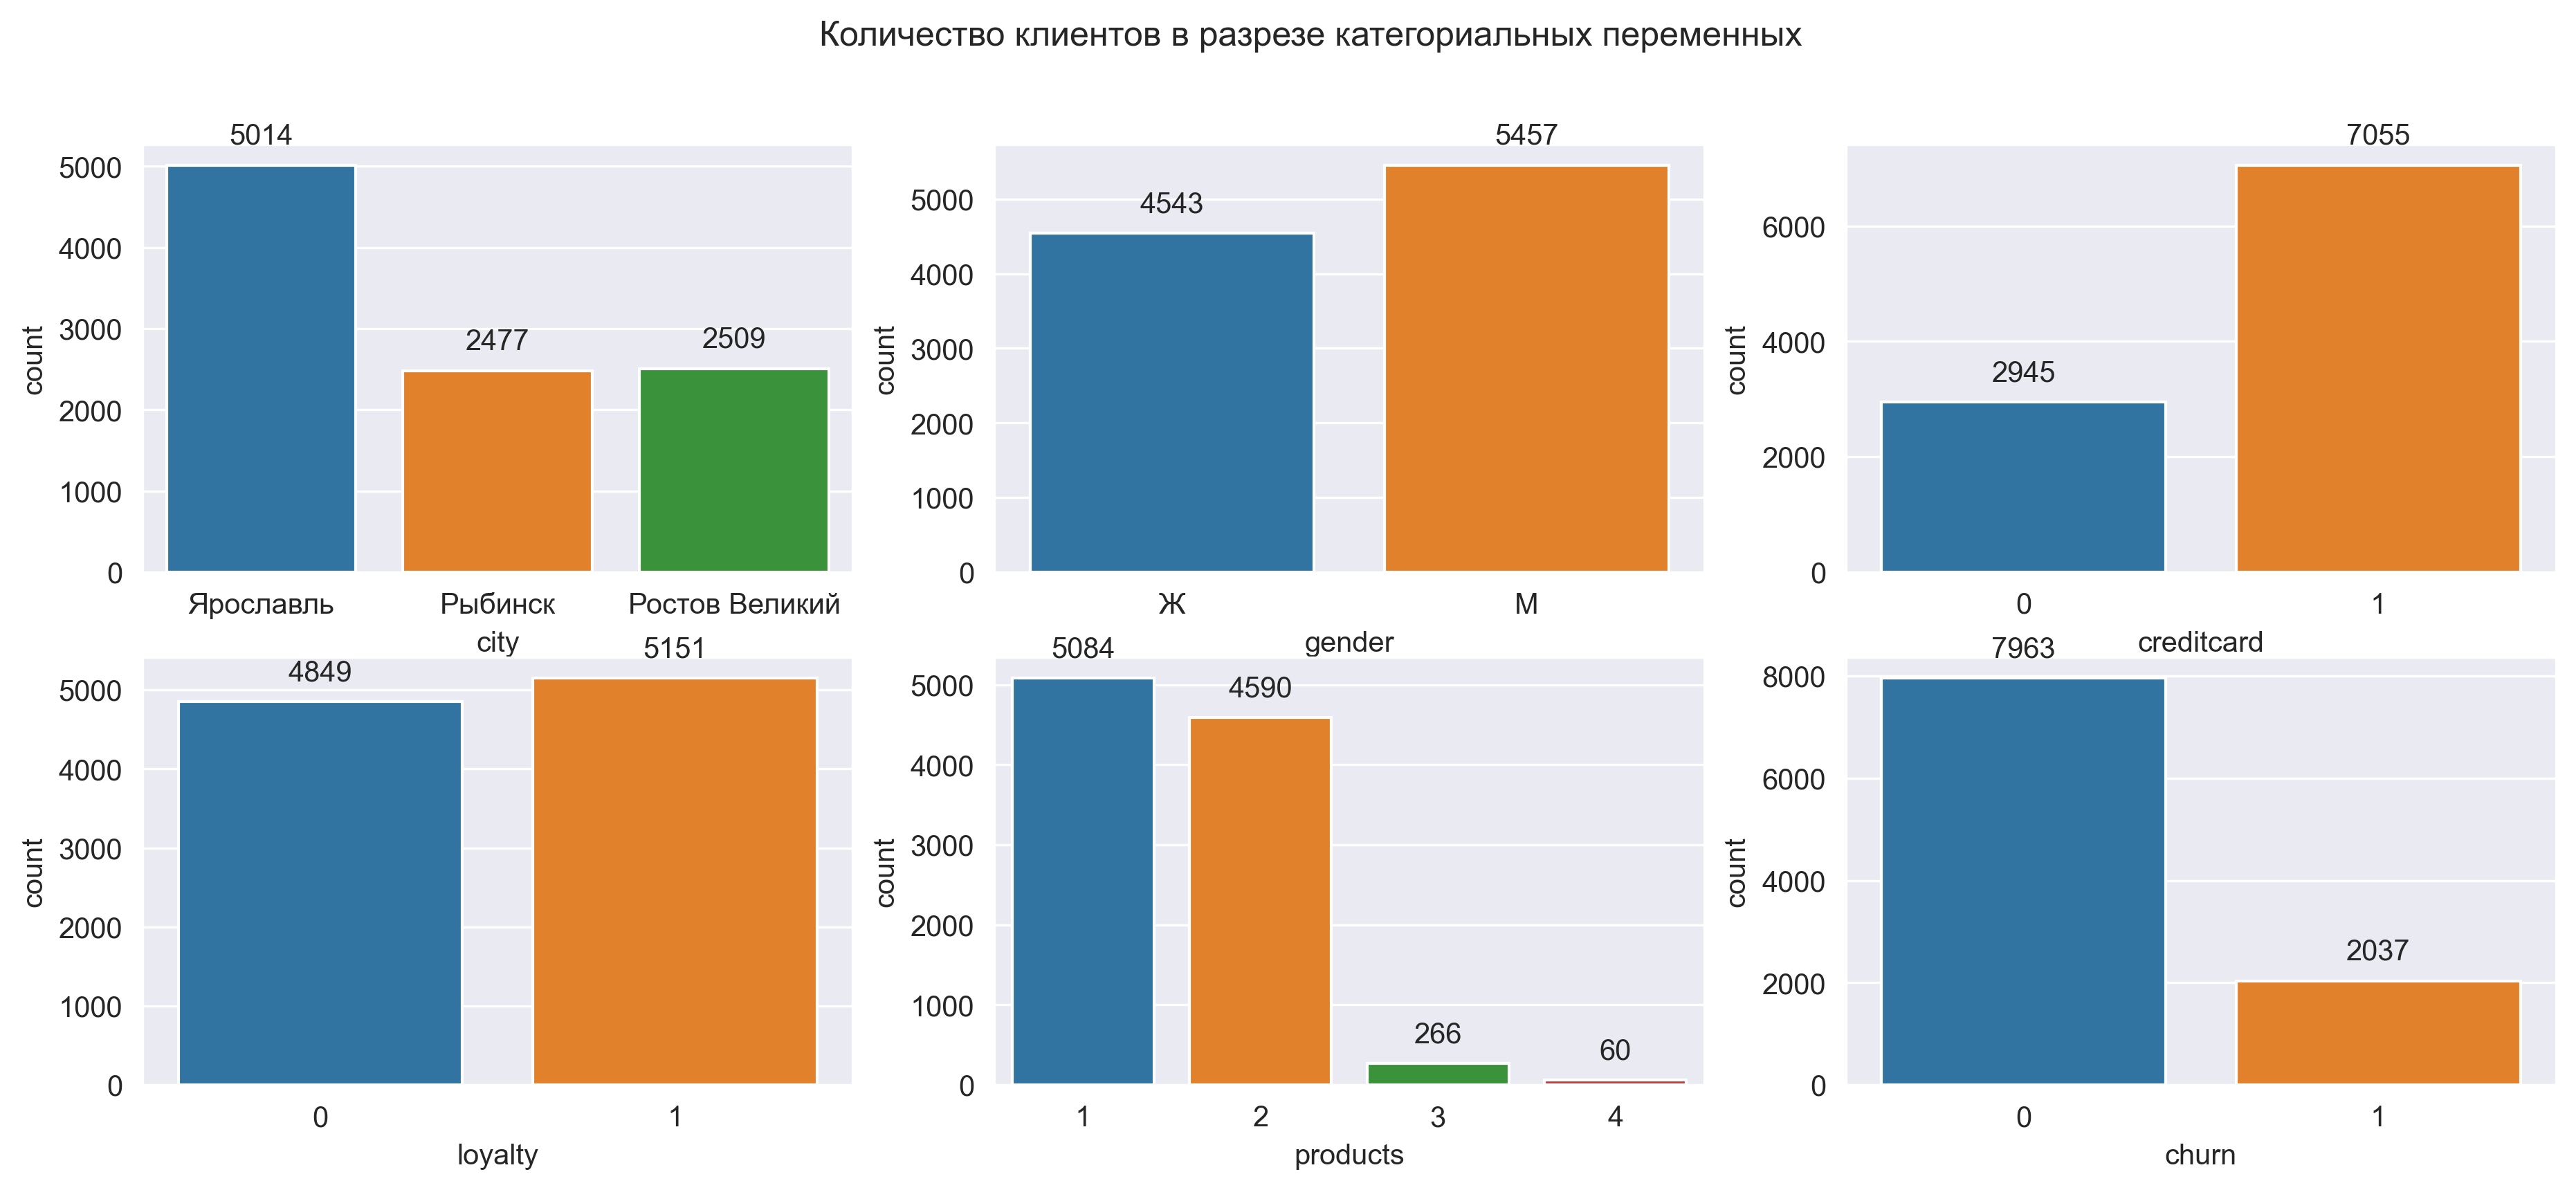

In [16]:
sns.set_style("darkgrid")
column_list = ['city', 'gender', 'creditcard', 'loyalty', 'products', 'churn']

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 6) 
fig.set_dpi(300)
for variable, subplot in zip(column_list, ax.flatten()):
    splot = sns.countplot(df[variable], ax=subplot)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
fig.suptitle("Количество клиентов в разрезе категориальных переменных");

 на графиках видим:
 * в Рыбинске и Ростове Великом примерно поровну клиентов, в Ярославле гораздо больше, все логично;
 * мужчин немного больше чем женщин;
 * Владельцев КК значительно больше чем клиентов не пользующихся картой;
 * клиентов совершают каки- либо действия в приложении и не делающих этого практически поровну;
 * в выборке есть клиенты с 1,2,3 и 4 продуктами банка, преобладают с 1 или 2;
 * отток довольно большой, около 20%.

Теперь построим распределения для количественных данных

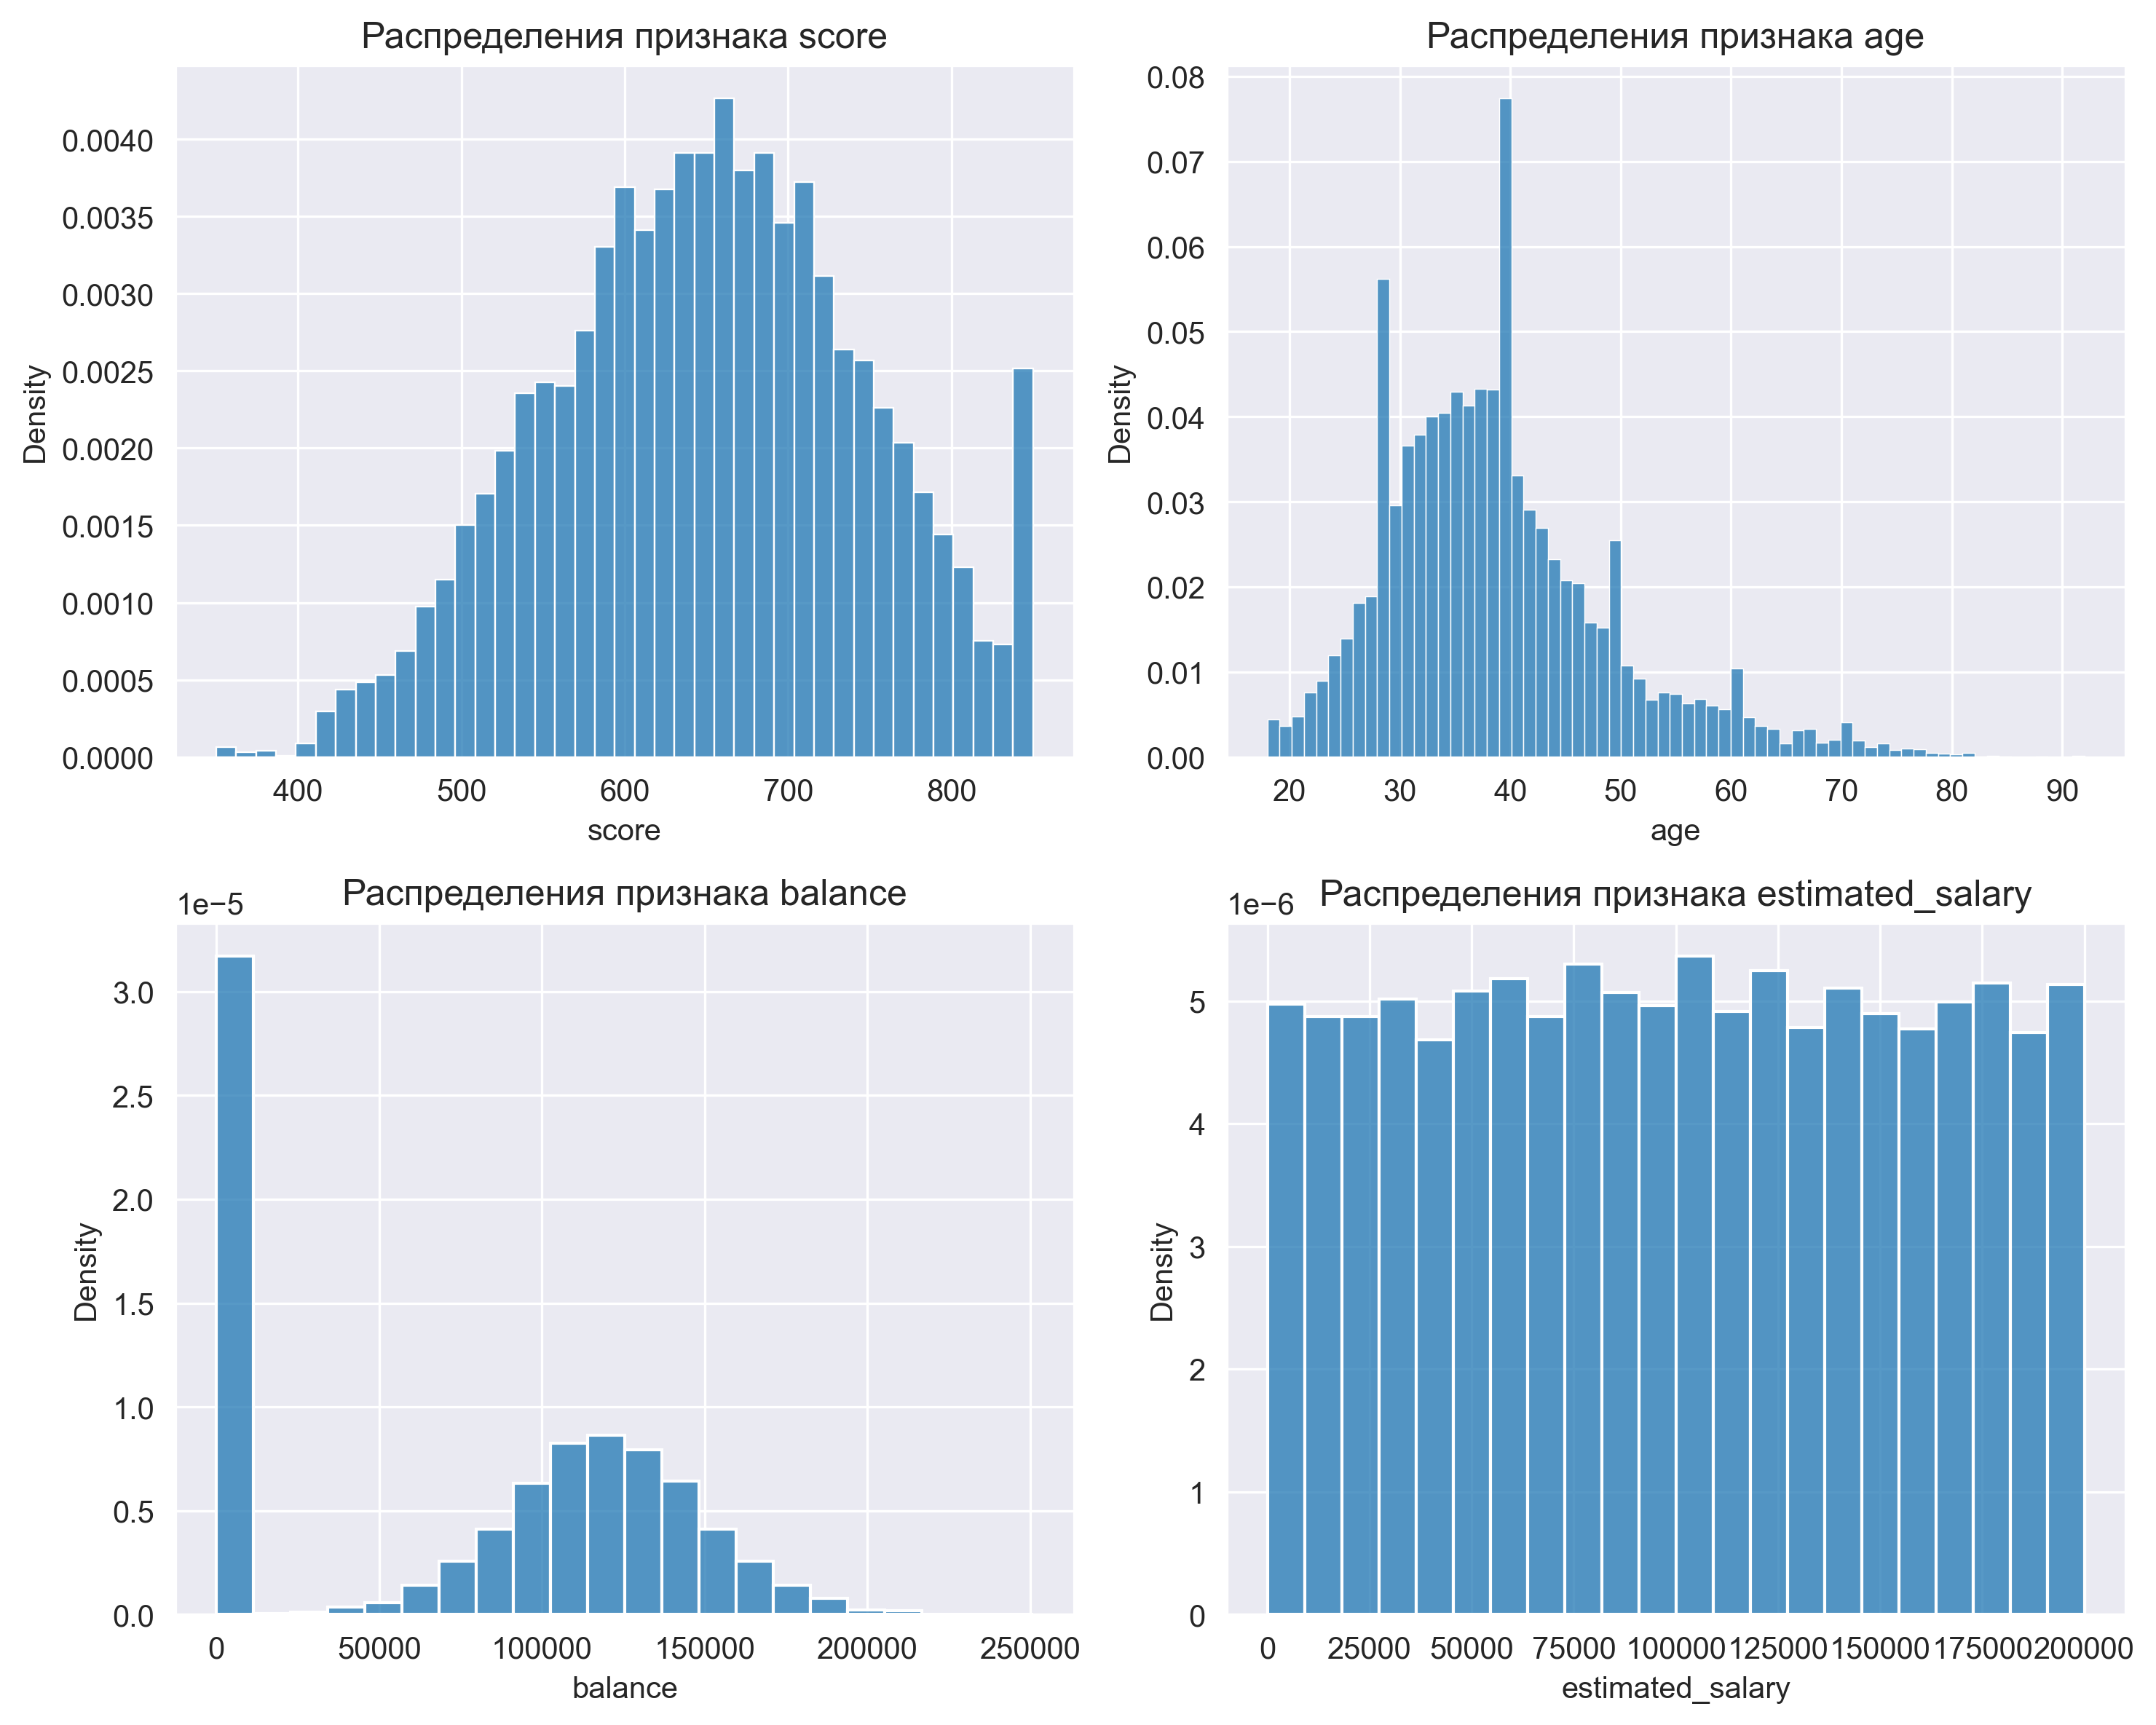

In [17]:
sns.set_style("darkgrid")
column_list = ['score', 'age', 'balance', 'estimated_salary']

fig, axs = plt.subplots(len(column_list) // 2, 2)
fig.set_size_inches(10, 8) 
fig.set_dpi(300)

new_axs = [item for sublist in axs for item in sublist]

for i, column in enumerate(column_list):
    sns.histplot(data=df, x=column,  stat='density', common_norm=False, palette="Blues_d",  ax=new_axs[i])
    new_axs[i].set_title('Распределения признака {}'.format(column))

plt.tight_layout()
plt.show();

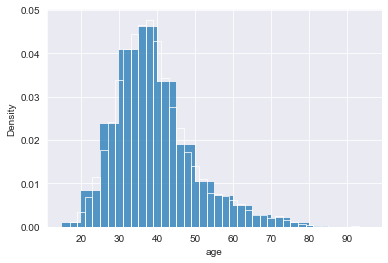

In [18]:

params = dict(
    data=df, 
    x='age',  
    stat='density', 
    binrange=(15,95)
)
sns.histplot(**params, binwidth=5, lw=0);
sns.histplot(**params, binwidth=2, fc=(0,0,0,0));

* распределение кредитного рейтинга возраста и баланса походит на нормальное, хотя имеются выбросы (например, максимальное значение рейтинга, добавленные нами нули в балансе несколько пик в графике возраста);
* распределение рассчитанного дохода скорее всего равномерное;
* график подтверждает, что большинство клиентов имеют высокий кредитный рейтинг;

Далее построим корреляционную таблицу

## Корреляционный анализ

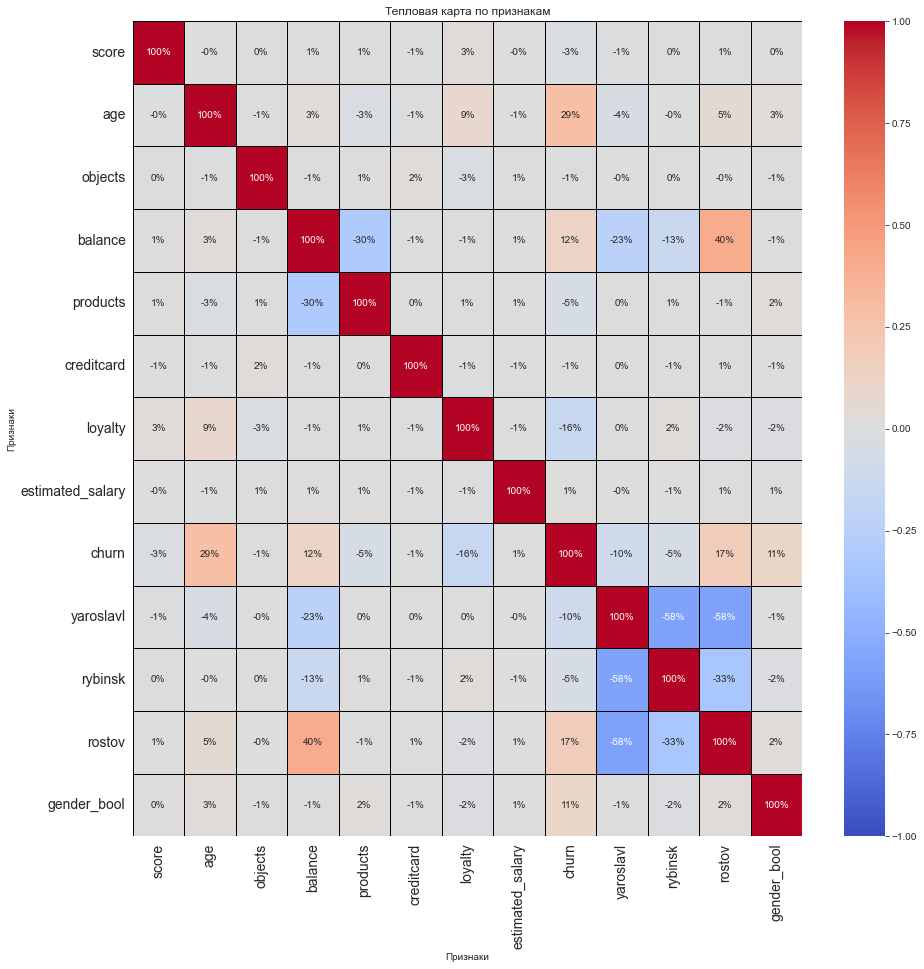

In [19]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, fmt='.0%', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title('Тепловая карта по признакам')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=360)
plt.ylabel('Признаки')
plt.xlabel('Признаки');



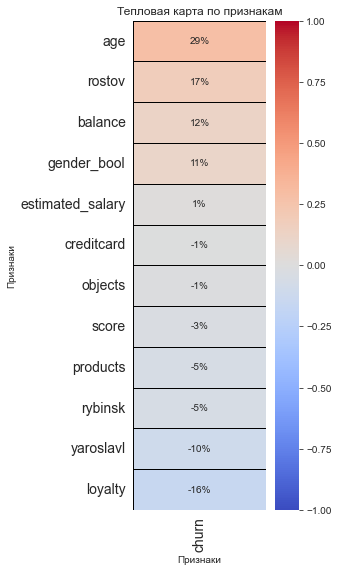

In [20]:
df_corr = df.corr().drop('churn').sort_values('churn', ascending=False)

plt.figure(figsize=(3, 9))
sns.heatmap(df_corr[['churn']], annot = True, fmt='.0%', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title('Тепловая карта по признакам')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=360)
plt.ylabel('Признаки')
plt.xlabel('Признаки');

interval columns not set, guessing: ['score', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn', 'yaroslavl', 'rybinsk', 'rostov', 'gender_bool']


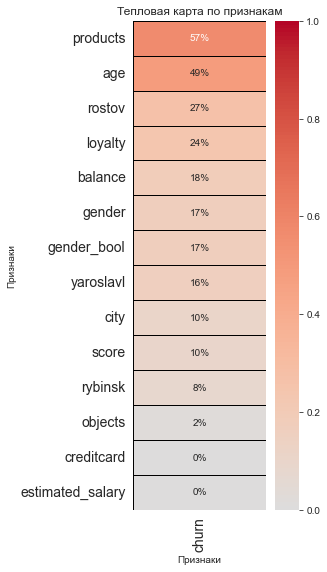

In [21]:
df_phik = df.phik_matrix().drop('churn').sort_values('churn', ascending=False)
plt.figure(figsize=(3, 9))
sns.heatmap(df_phik[['churn']], annot = True, fmt='.0%', vmin=0, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title('Тепловая карта по признакам')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=360)
plt.ylabel('Признаки')
plt.xlabel('Признаки');


На корреляионной таблице каких - то сильных линейных зависимостей не наблюдаем, можно отметить следующие небольшие корреляции:
* отток связан с возрастом 0,3.
* у оттока имеется небольшая связь по географическому признаку 0,2 с Ростов Великий;
* Ростов Великий и баланс 0,4
* у количества продуктов и баланса небольшая обратная связь -0,3.


На phik корреляцинной таблице прослеживается связь оттока с количеством продуктов и возрастом
в чуть меньшей степени с городом Ростов, активностью балансом и полом

## Анализ метрик в разрезе продуктов

In [22]:
df.groupby('products').mean().T

products,1,2,3,4
score,649.12,652.19,648.11,653.58
age,39.67,37.75,43.20,45.68
objects,4.97,5.05,5.00,5.30
balance,98551.87,51879.15,75458.33,93733.13
creditcard,0.70,0.71,0.71,0.68
loyalty,0.50,0.53,0.42,0.48
estimated_salary,99487.26,100452.01,104318.13,104763.72
churn,0.28,0.08,0.83,1.00
yaroslavl,0.49,0.52,0.39,0.48
rybinsk,0.24,0.26,0.25,0.12


In [23]:
df.groupby('products')['age'].count()

products
1    5084
2    4590
3     266
4      60
Name: age, dtype: int64

Наблюдаем просто катастрофическую долю оттока у клиентов, пользующихся 3-4 продуктами. Доля оттока у них составляет 82-100% Несмотря на их небольшое количество следует отдельно обратить внимание на эти группы.
 * в них больше женщин;
 * средний возраст выше, чем у остальных клиентов;
 * меньшая часть клиентов совершают активности в приложении

Также довольно высокую долю оттока наблюдаем у клиентов с одним продуктом - порядка 28%.

Построим распределения в разрезе количества потребляемых продуктов. Посколько группы 3 и 4 малочисленны, объединим их в одну и обозначим как 3.

In [24]:
df.loc[df['products'] == 4, 'products'] = 3

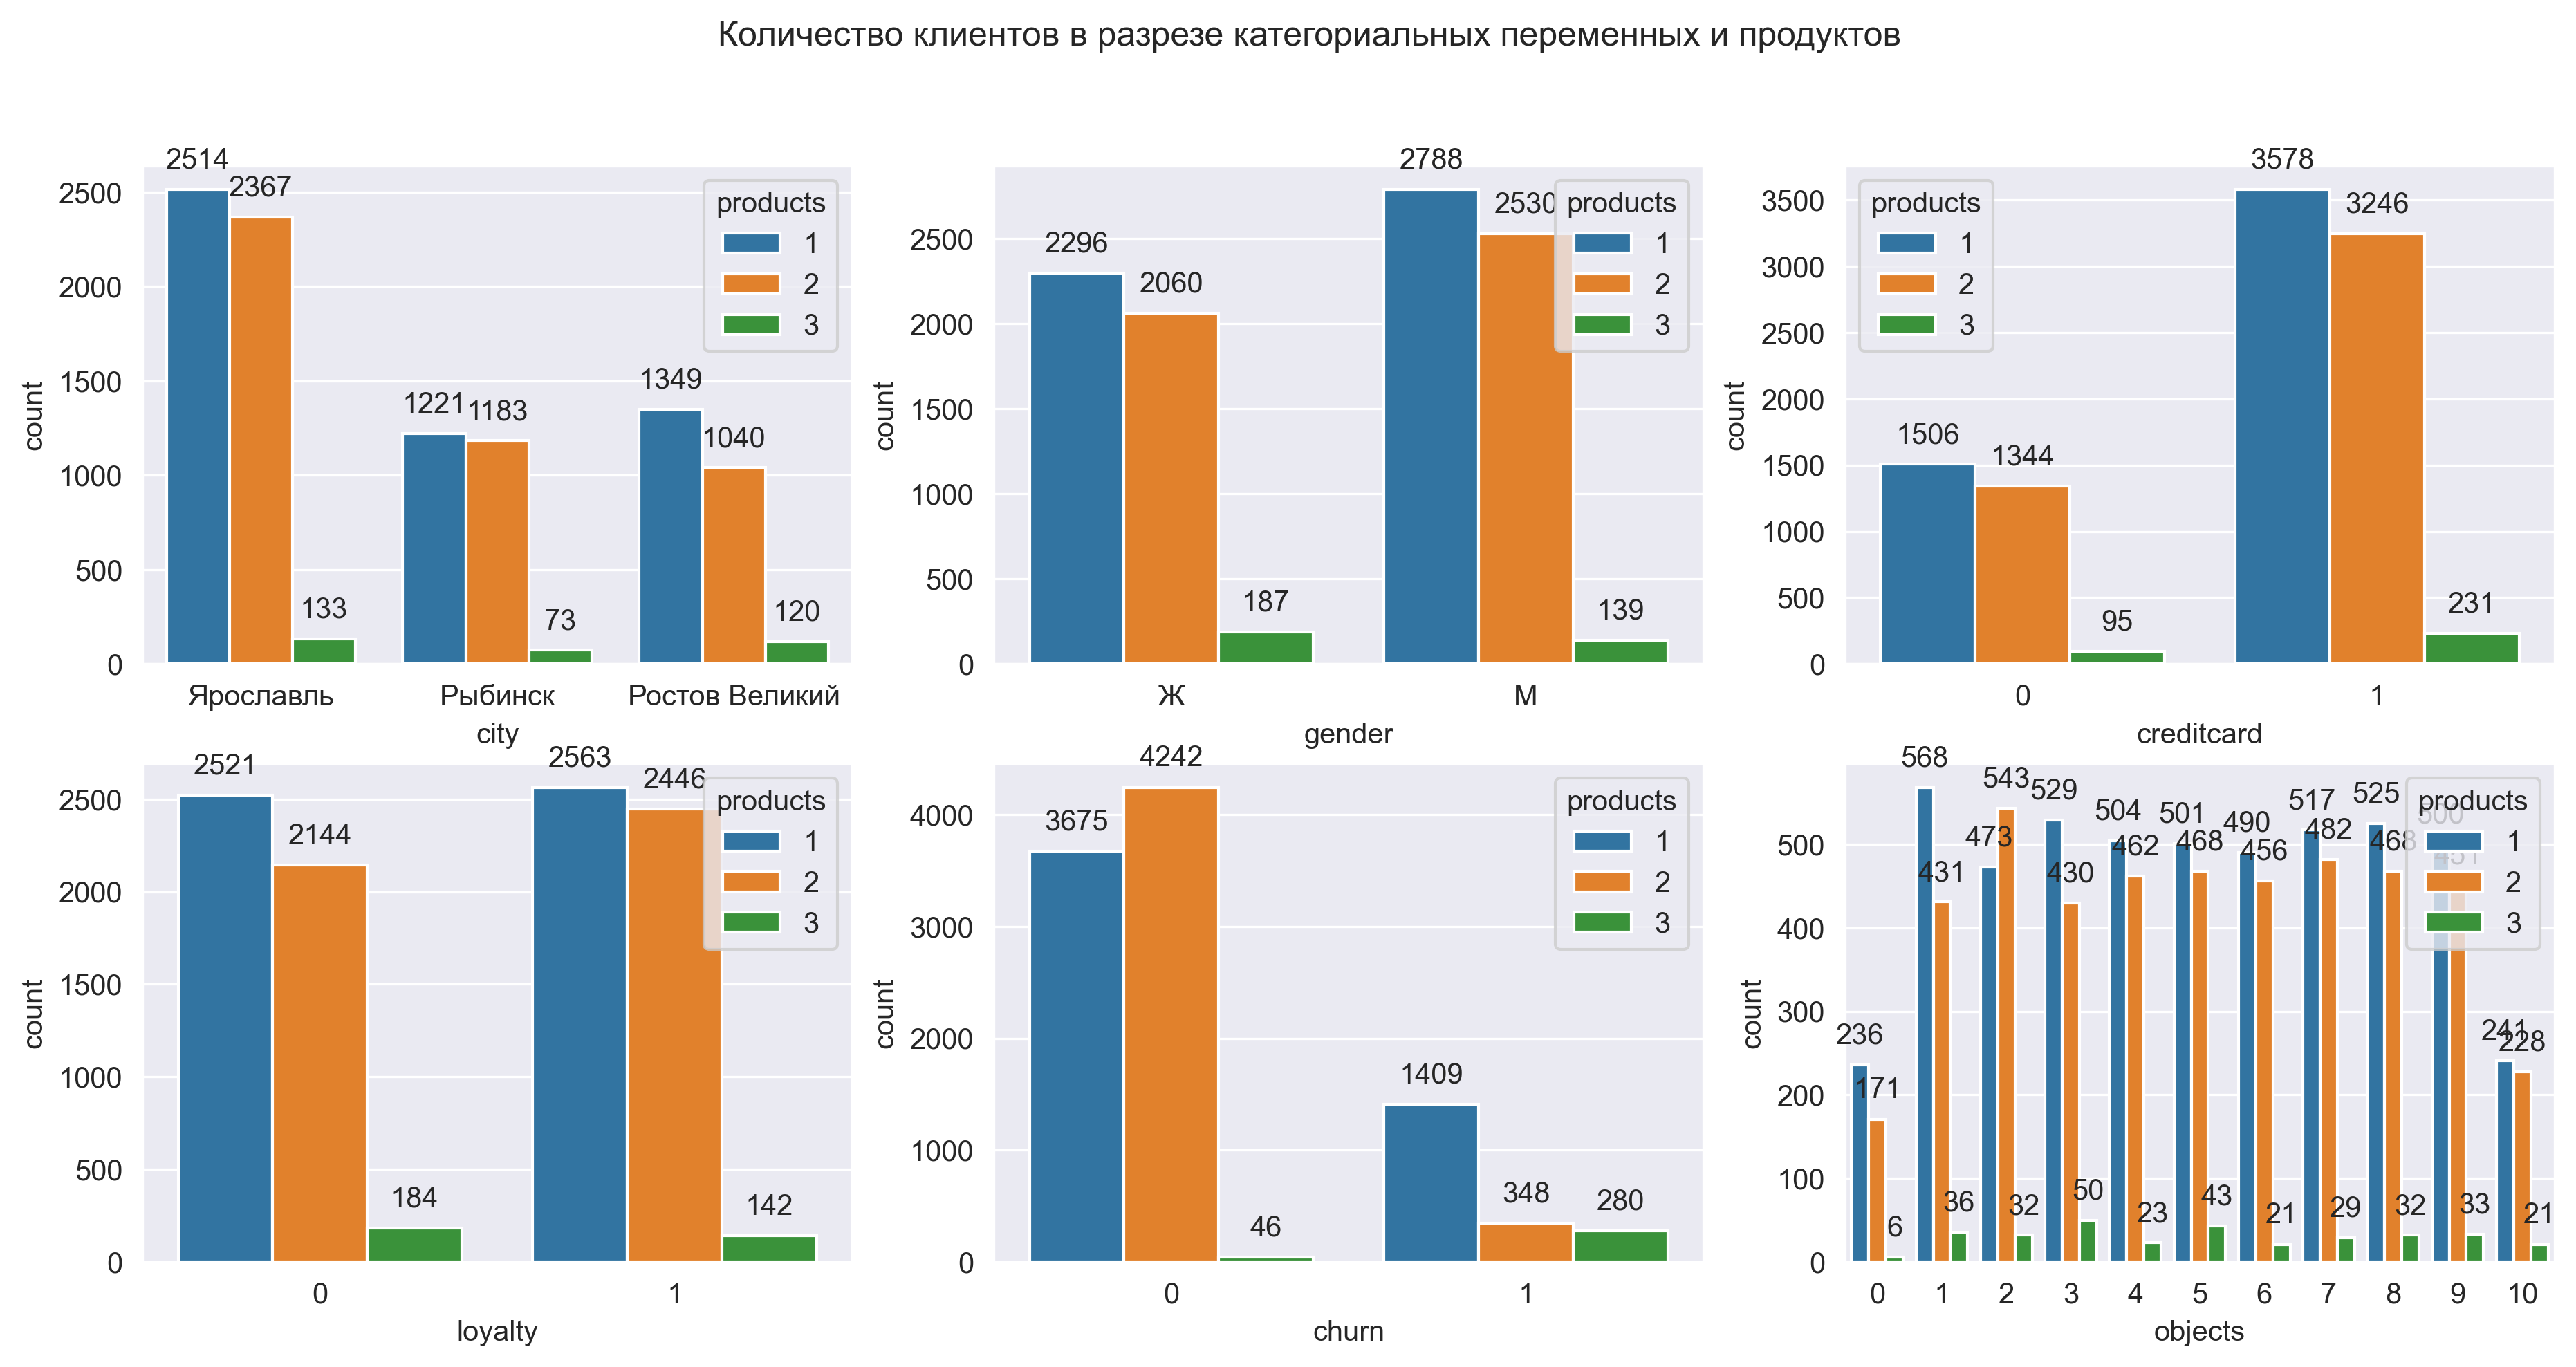

In [25]:
values = ['city', 'gender', 'creditcard', 'loyalty', 'churn', 'objects']

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 7) 
fig.set_dpi(300)

for variable, subplot in zip(values, ax.flatten()):
    splot = sns.countplot(data=df, x=variable, hue='products', ax=subplot)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
fig.suptitle("Количество клиентов в разрезе категориальных переменных и продуктов");

Ключевые метрика для нас — это отток, поэтому анализируя графики с учетом того, что лучшая группа по оттоку — это 2, худшая 3, в группе с 1 продуктом значение оттока также оставляет желать лучшего.

* в группе 2 чуть чаще пользуются приложением;
* меньше всего клиентов с двумя продуктами проживают в Ростове Великом;
* 1 - 2 продуктами чаще пользуются мужчины, 3-4 женщины;
* во всех группах пользователей кредитных карт больше,чем клиентов, не имеющих данного продукта. 

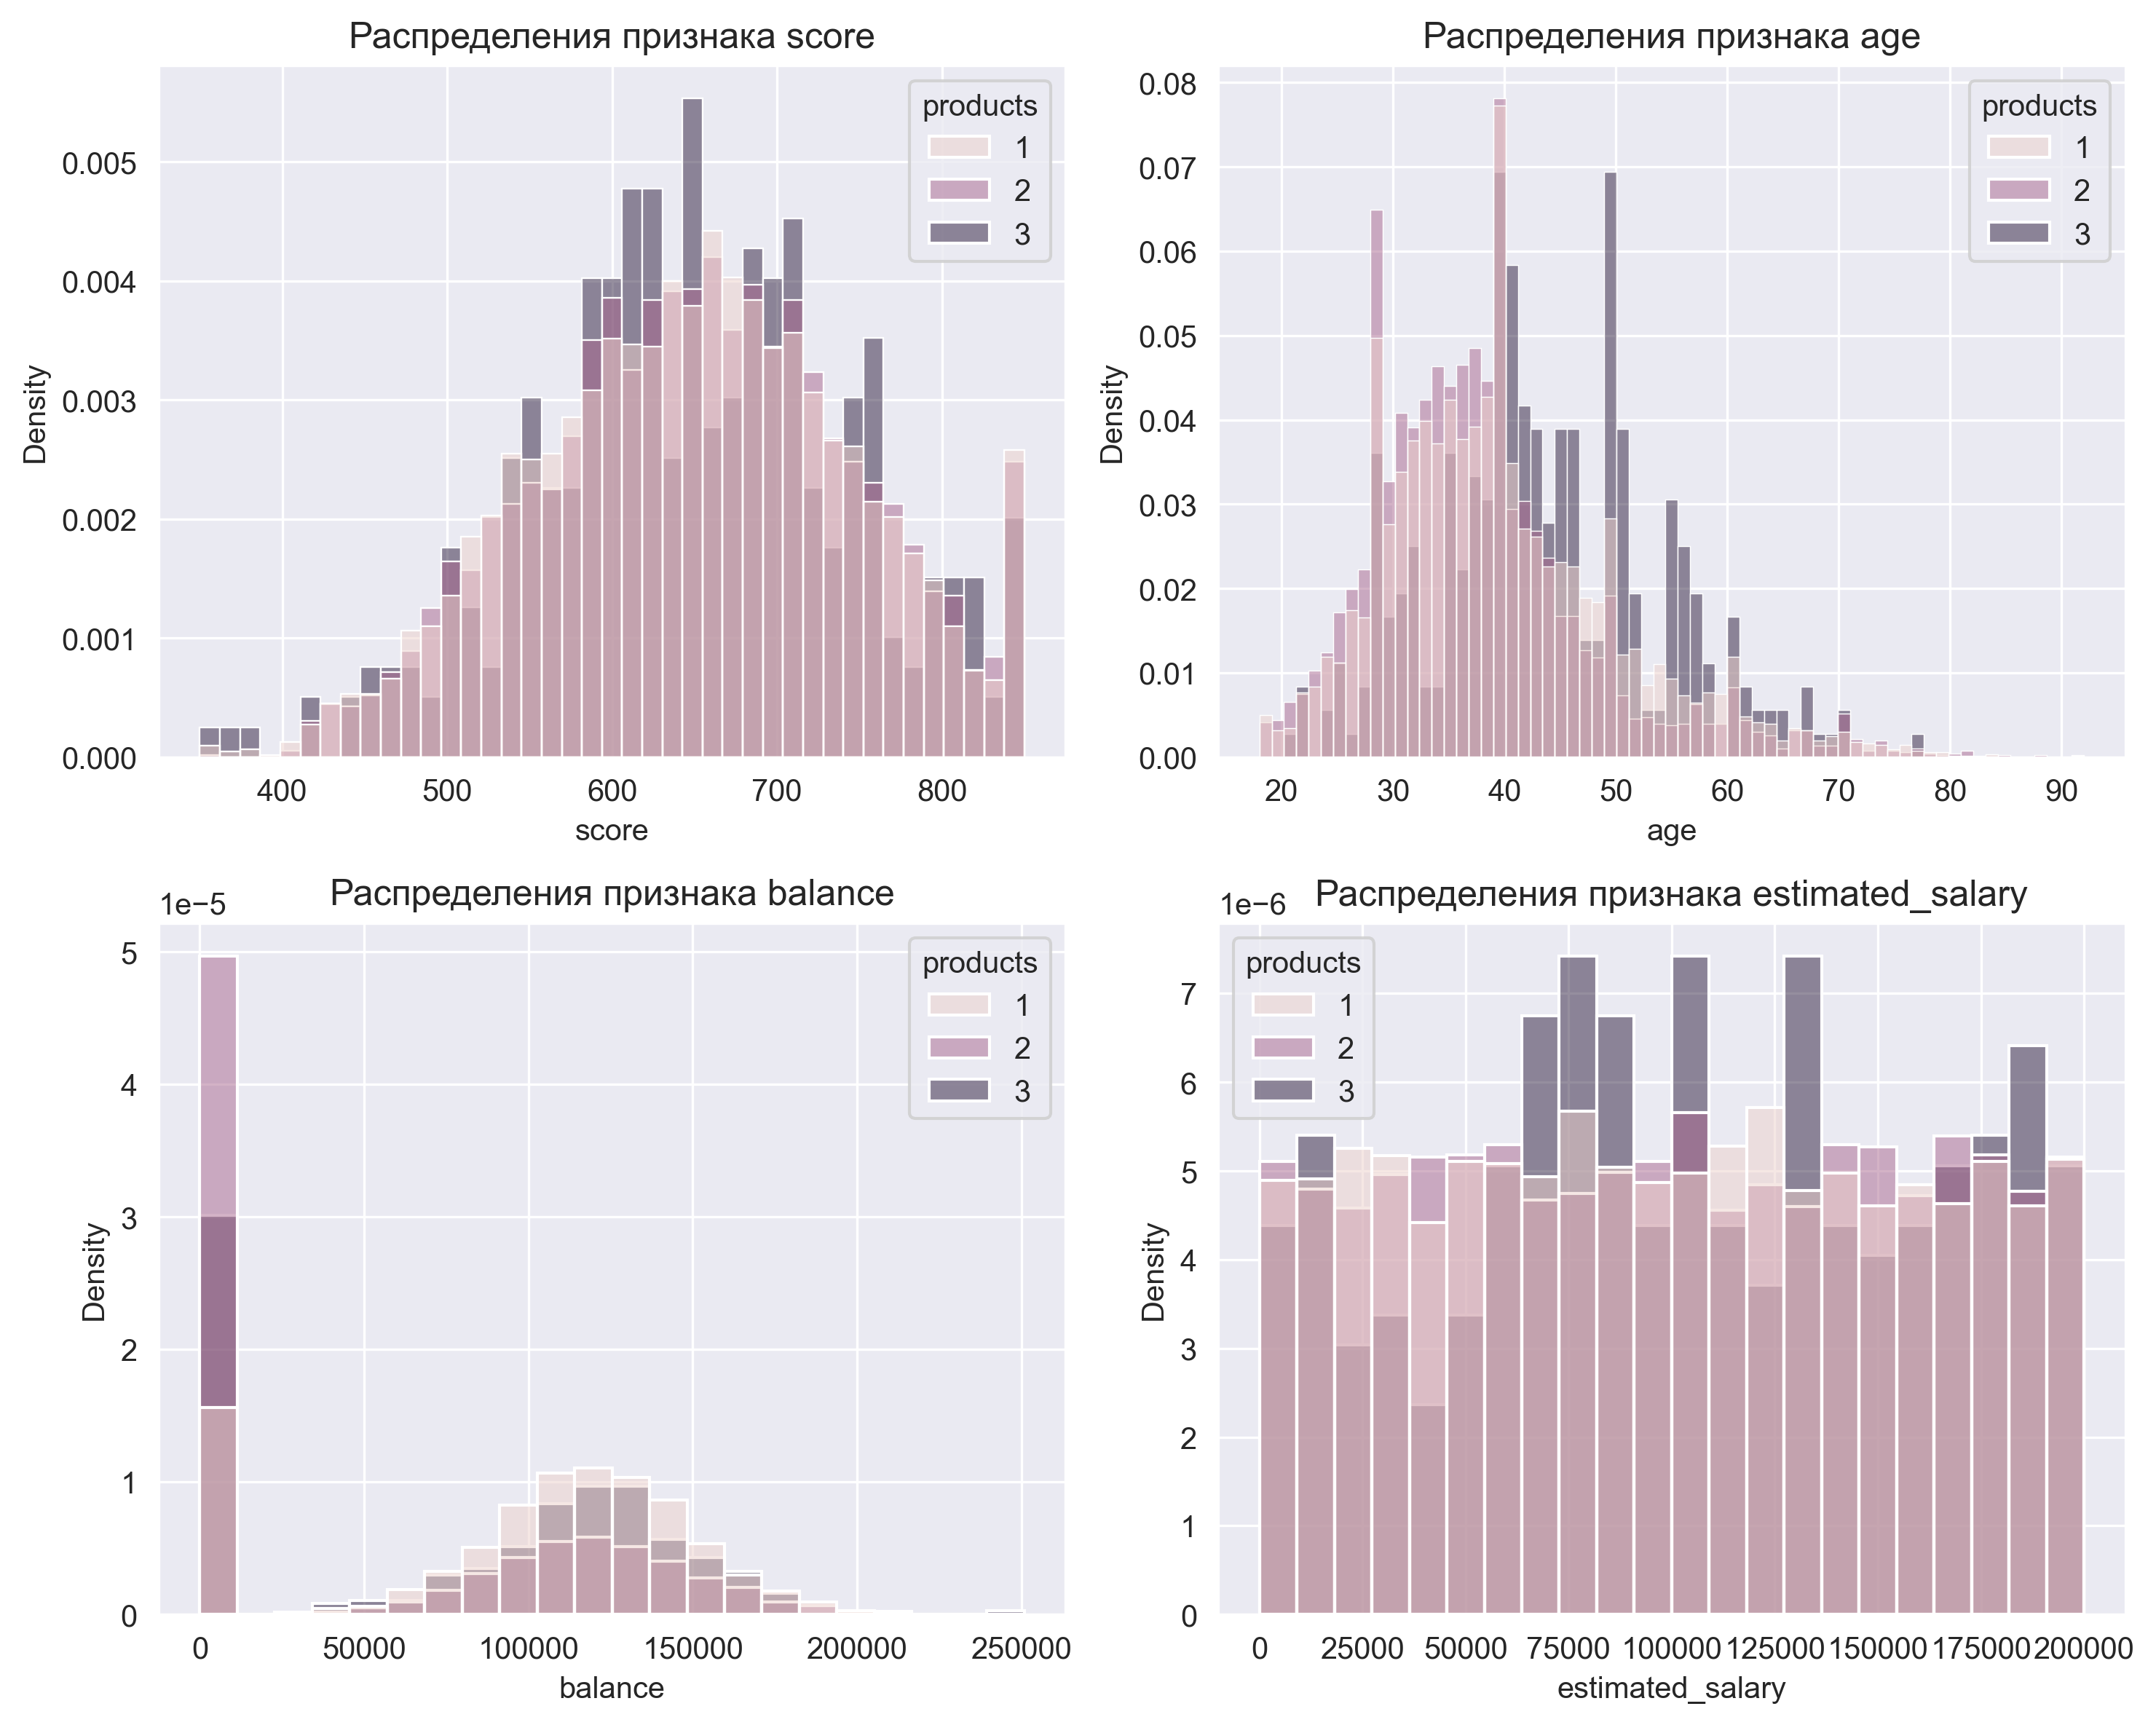

In [26]:
columns_list = ['score', 'age', 'balance', 'estimated_salary']

fig, axs = plt.subplots(len(columns_list) // 2, 2)
fig.set_size_inches(10, 8) 
fig.set_dpi(300)

new_axs = [item for sublist in axs for item in sublist]

for i, column in enumerate(columns_list):
    sns.histplot(data=df, x=column,  stat='density', hue = 'products', common_norm=False,  ax=new_axs[i])
    new_axs[i].set_title('Распределения признака {}'.format(column))

plt.tight_layout()
plt.show();

* в группе с 3-4 продуктами люди более старшего поколения;
* распределение баланса напоминает нормальное во всех группах.

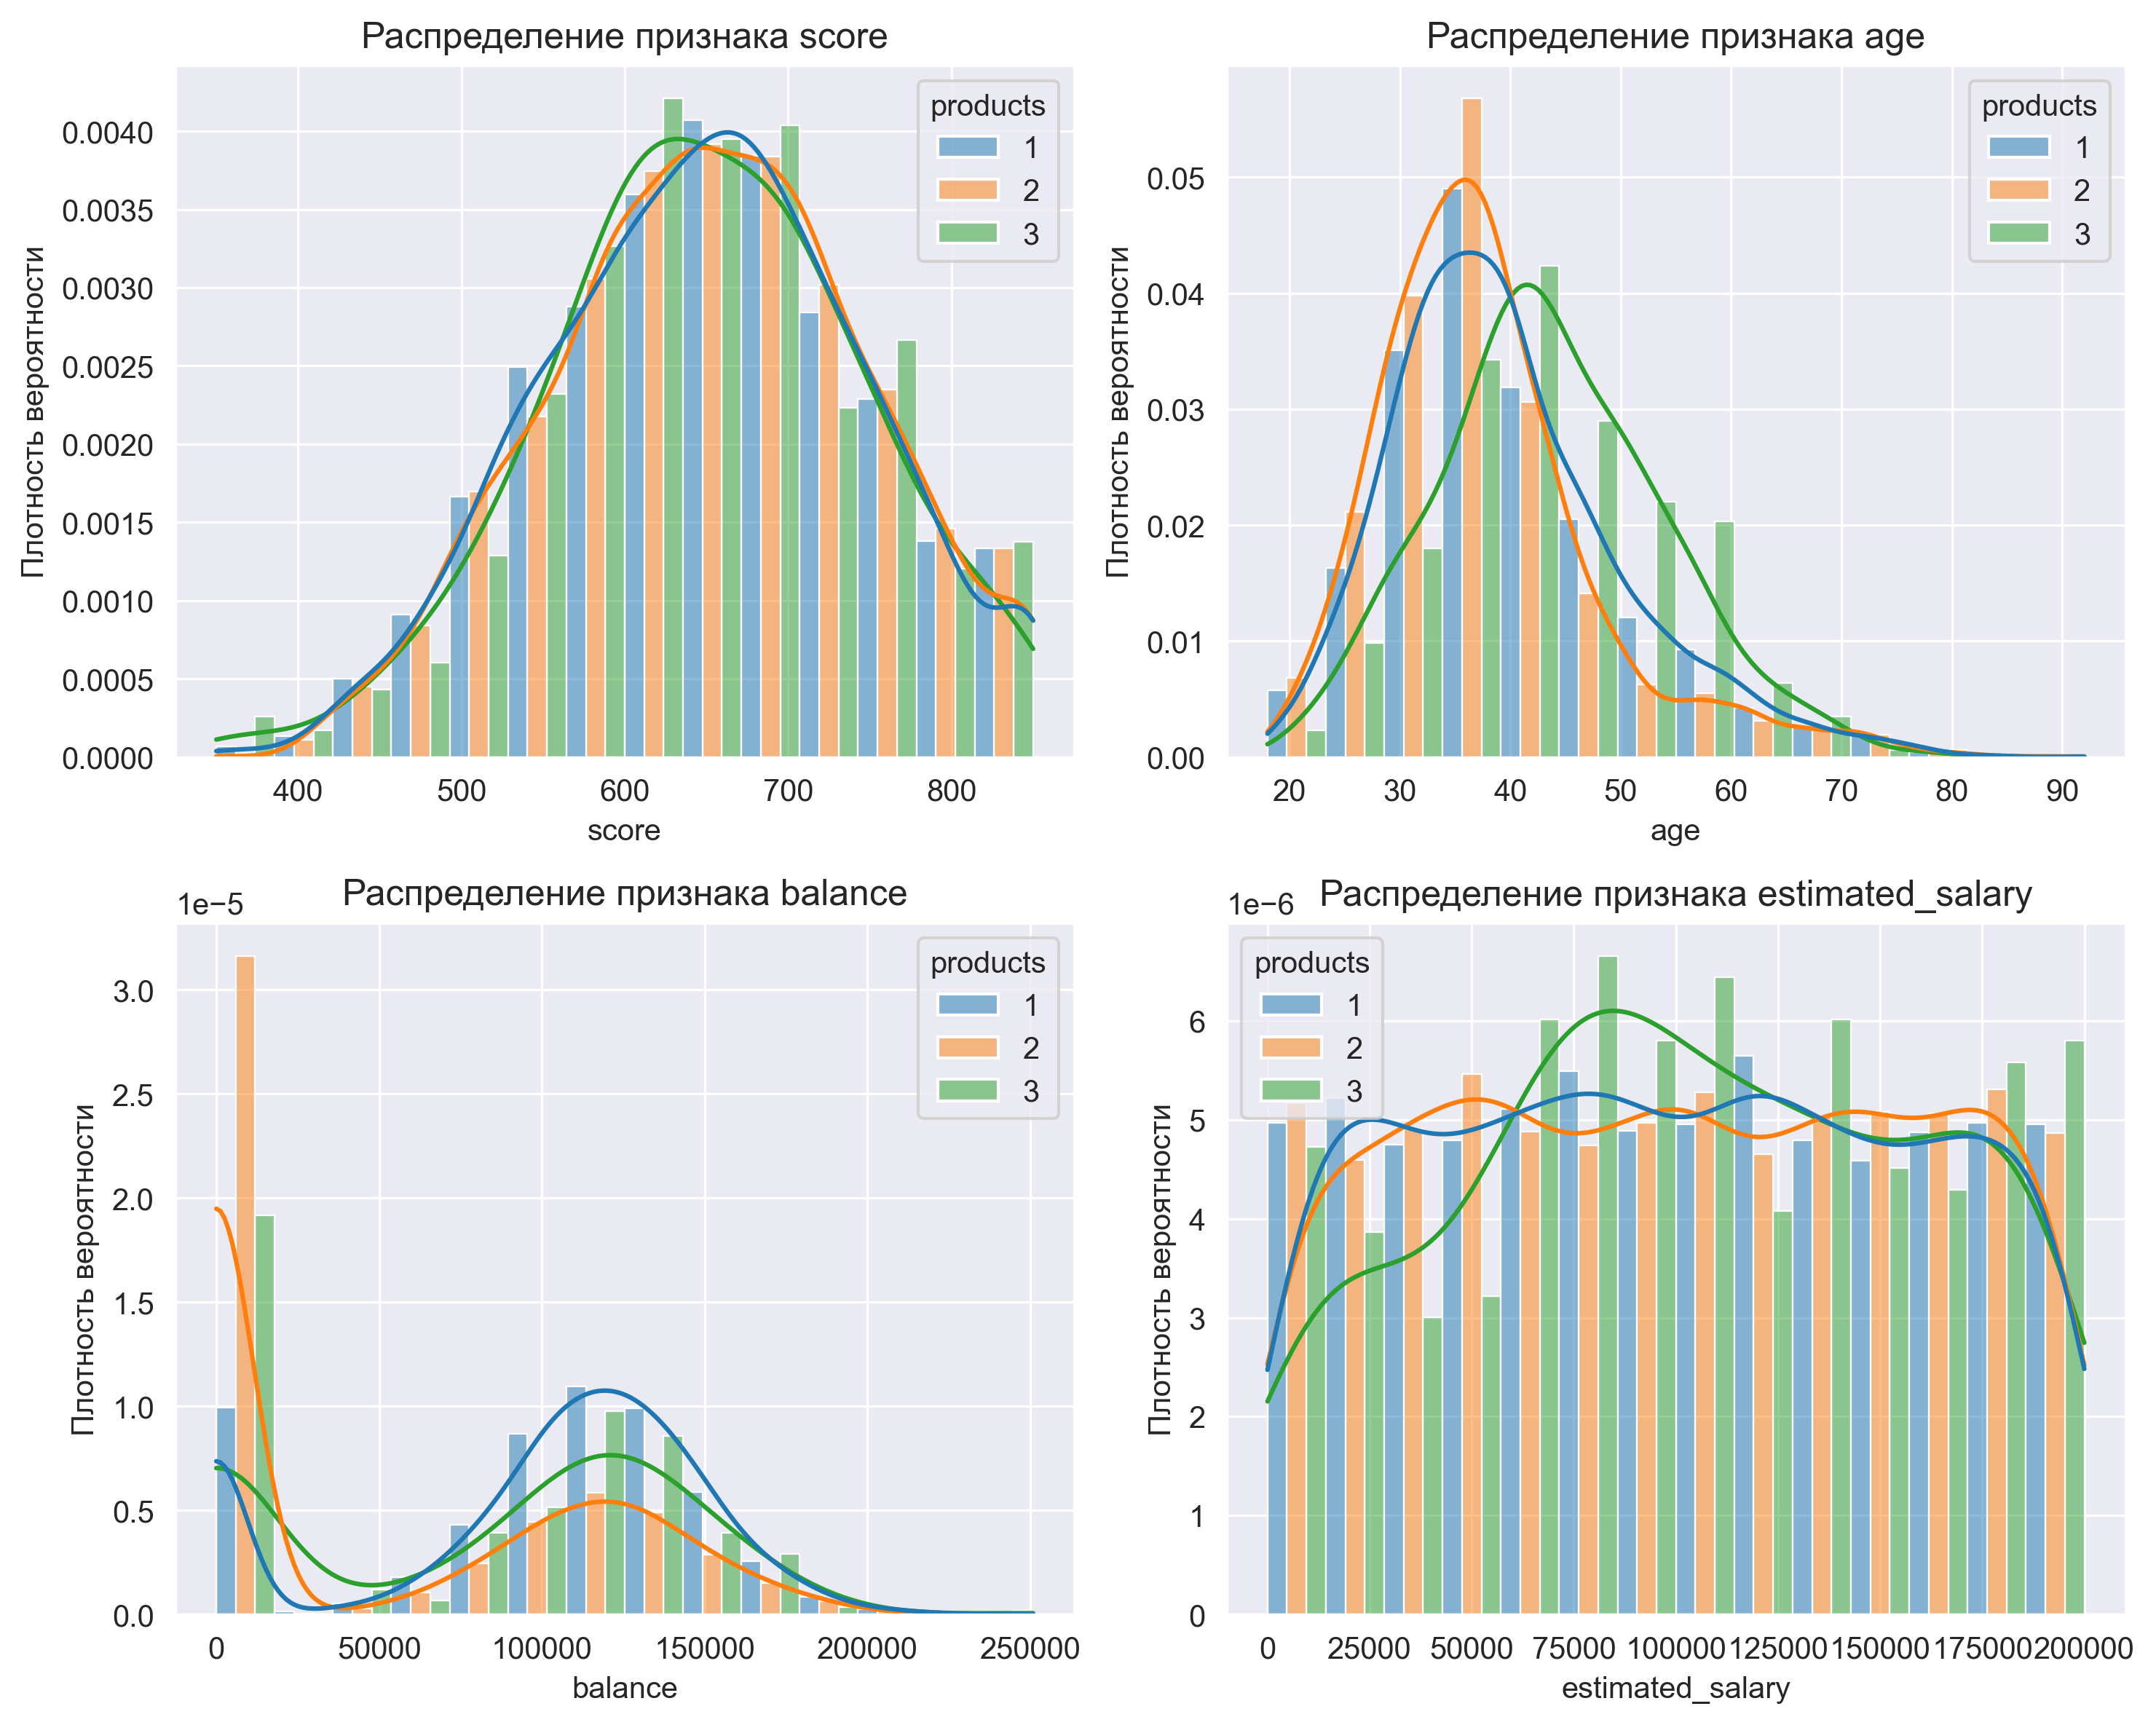

In [27]:

columns_list = ['score', 'age', 'balance', 'estimated_salary']

fig, axs = plt.subplots(len(columns_list) // 2, 2)
fig.set_size_inches(10, 8) 
fig.set_dpi(300)

for i, column in enumerate(columns_list):
    sns.histplot(
        data=df.assign(products=df.products.clip(1,3)), 
        x=column,  
        stat='density', 
        hue = 'products', 
        multiple='dodge',
        palette='tab10',
        kde=True, 
        common_norm=False,
        bins=14,
        ax=axs.ravel()[i])\
    .set(title = f'Распределение признака {column}', ylabel="Плотность вероятности")

plt.tight_layout()
plt.show();

## Отток. Портрет клиента

Теперь посмотрим на средние значения в разрезе отттока.

In [28]:
df.groupby('churn').mean().T

churn,0,1
score,651.85,645.35
age,37.41,44.84
objects,5.03,4.93
balance,72745.30,91108.54
products,1.54,1.45
creditcard,0.71,0.70
loyalty,0.55,0.36
estimated_salary,99738.39,101465.68
yaroslavl,0.53,0.40
rybinsk,0.26,0.20


На первый взгляд можно отметить следующее:
* женщины более склонны к оттоку чем мужчины;
* средний возраст отточного клиента выше - около 44-45 лет;
* наименьшая доля оттока в Рыбинске, значительно выше в Ростове Великом и Ярославле;
* доля оттока у владельцев КК и тех, кто ей не пользуется мало различаются. 

Далее посмотрим на распределения по категориальным переменным в разрезе оттока

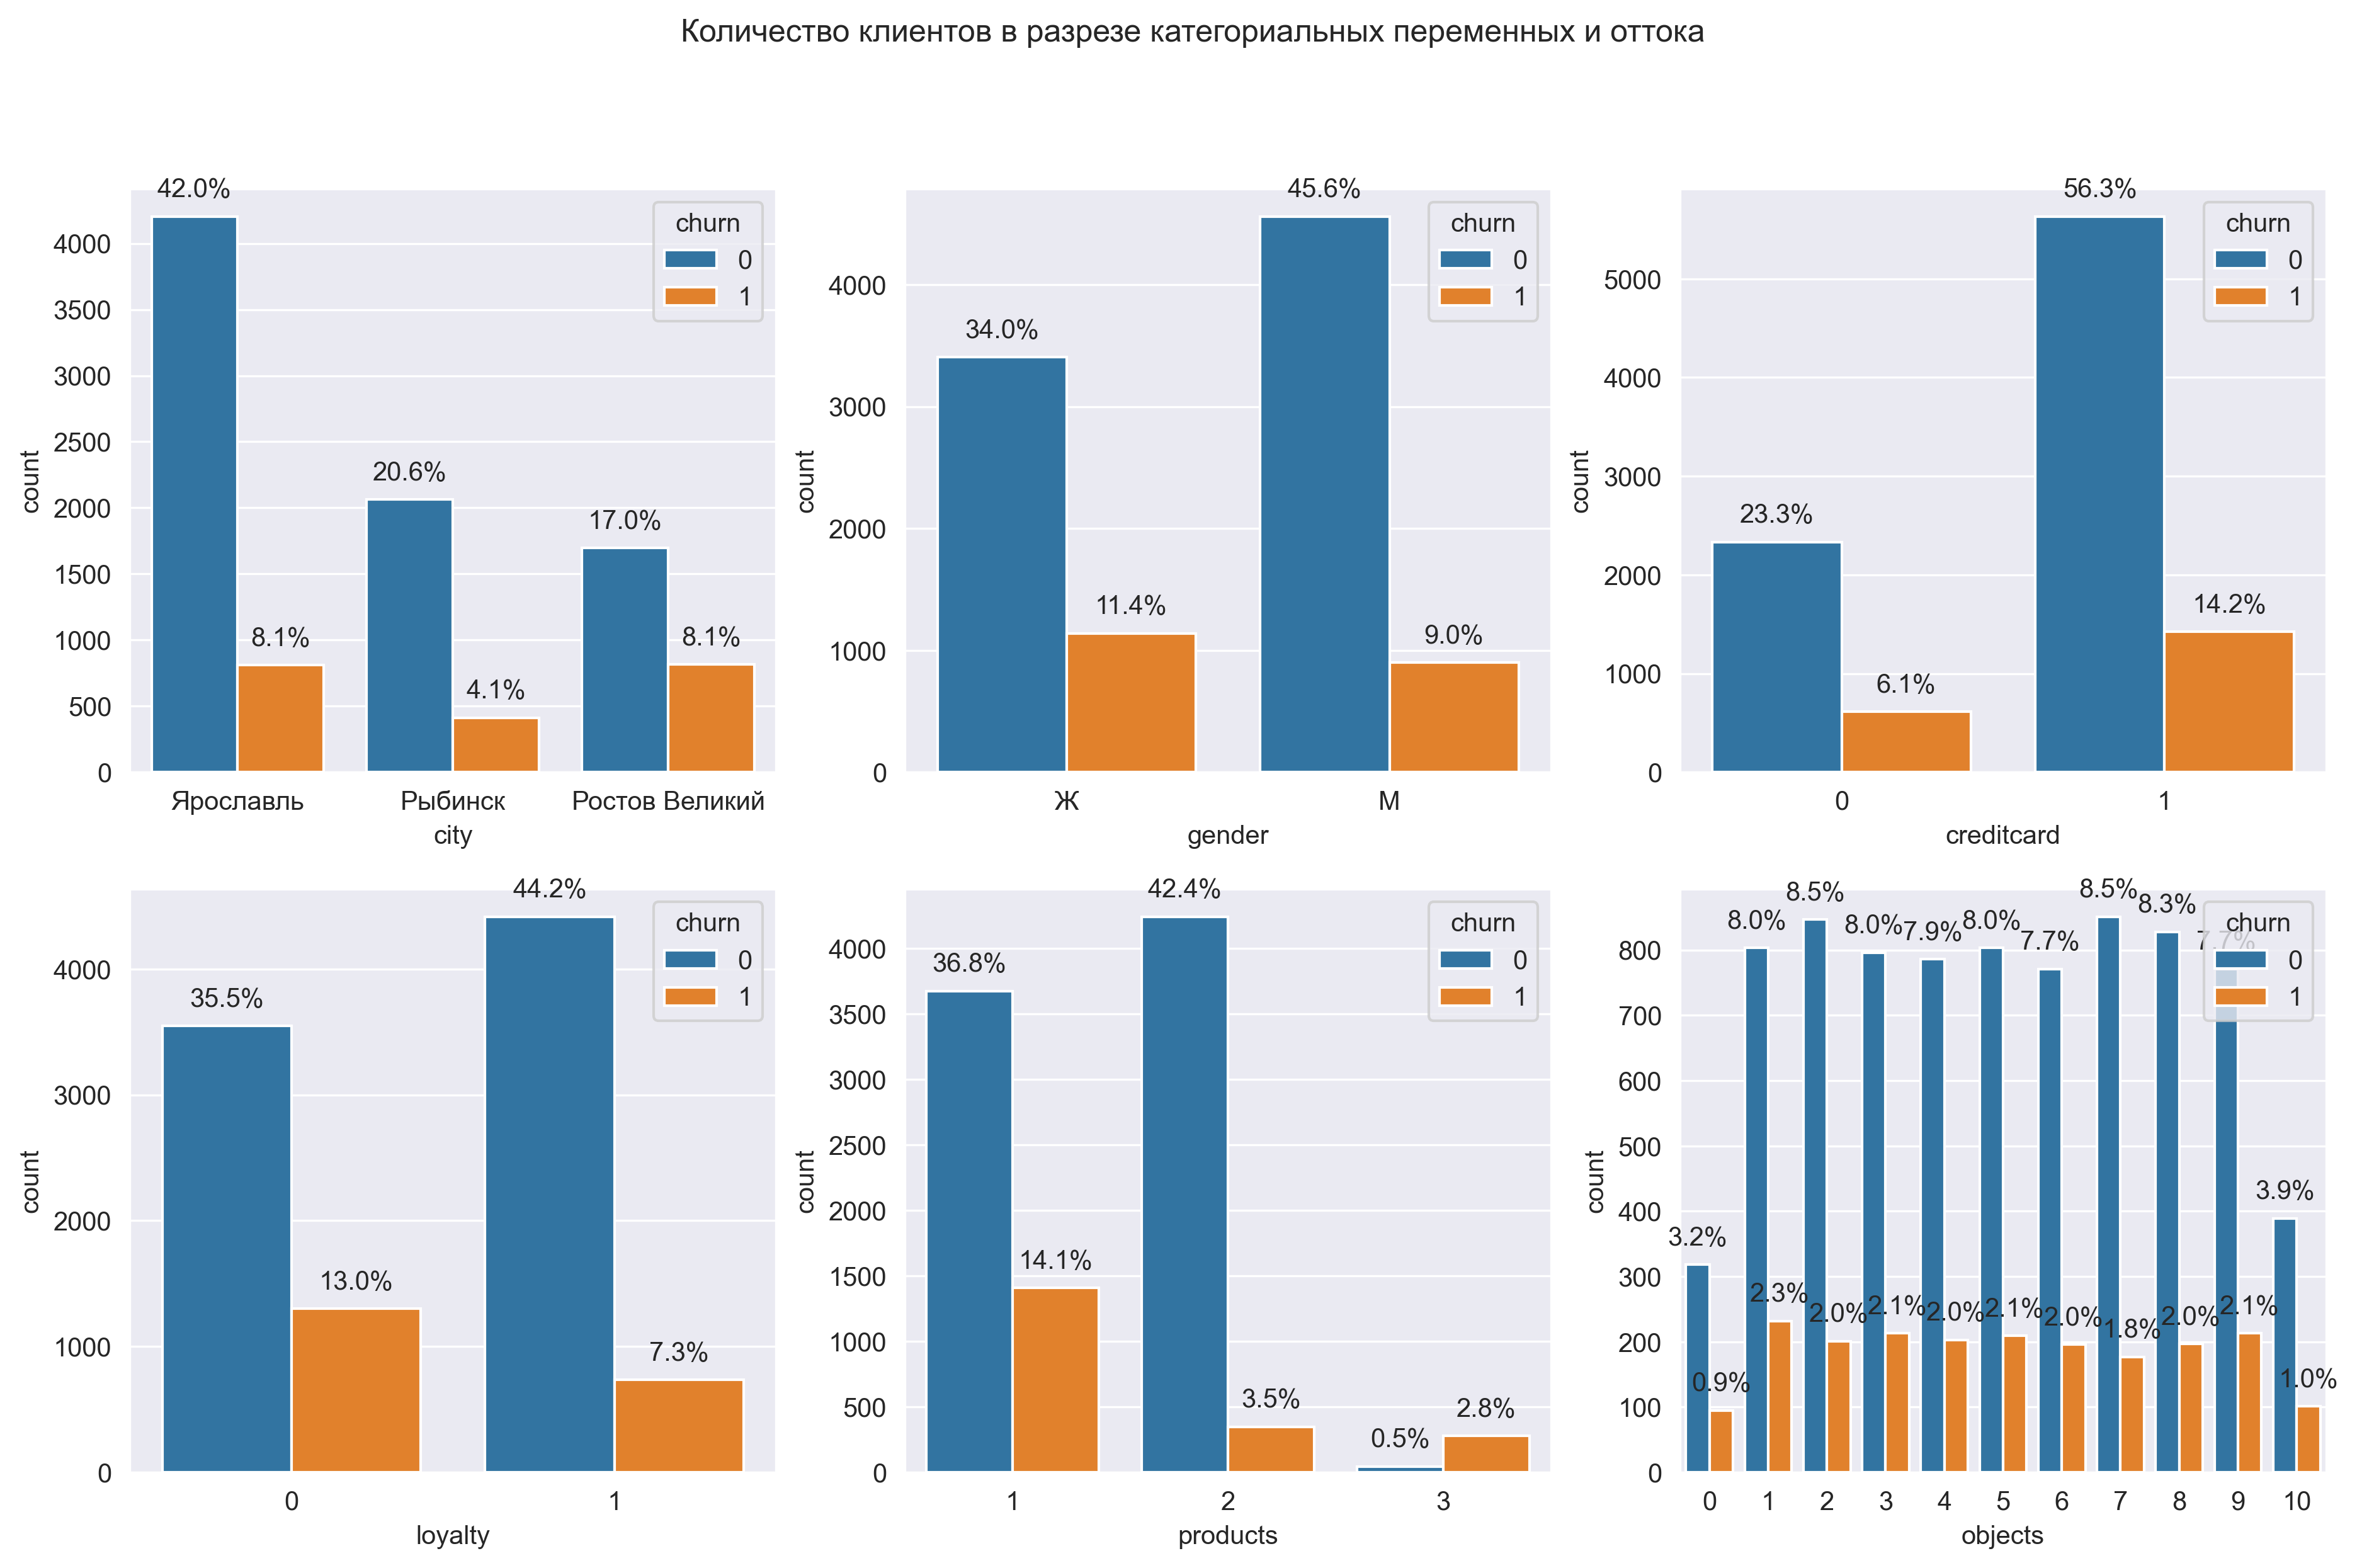

In [29]:
values = ['city', 'gender', 'creditcard', 'loyalty', 'products', 'objects']

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 9) 
fig.set_dpi(300)

for variable, subplot in zip(values, ax.flatten()):
    splot = sns.countplot(data=df, x=variable, hue='churn', ax=subplot)
    for p in splot.patches:
        splot.annotate('{:.1f}%'.format(p.get_height()/len(df[variable])*100), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
                                               
        fig.suptitle("Количество клиентов в разрезе категориальных переменных и оттока");

Изучив полученные графики можем заключить следующее:

* самая высокая доля оттока в Ростове Великом;
* женщины чуть более склонны к оттоку;
* доля оттока среди тех, кто совершает действия в приложении заметно ниже чем среди малоактивных клиентов;
* несмотря на то, что клиентов с 3-4 продуктами мало, доля оттока в них выше доли удержания, также вызывает беспокойство
* высокая доля оттока у клиентов с одним продуктом;
* параметр `object` мало информативен, т.к. мы не знаем, что за ним стоит "старый ржавый мотоцикл" или "дворец в Геленджике"

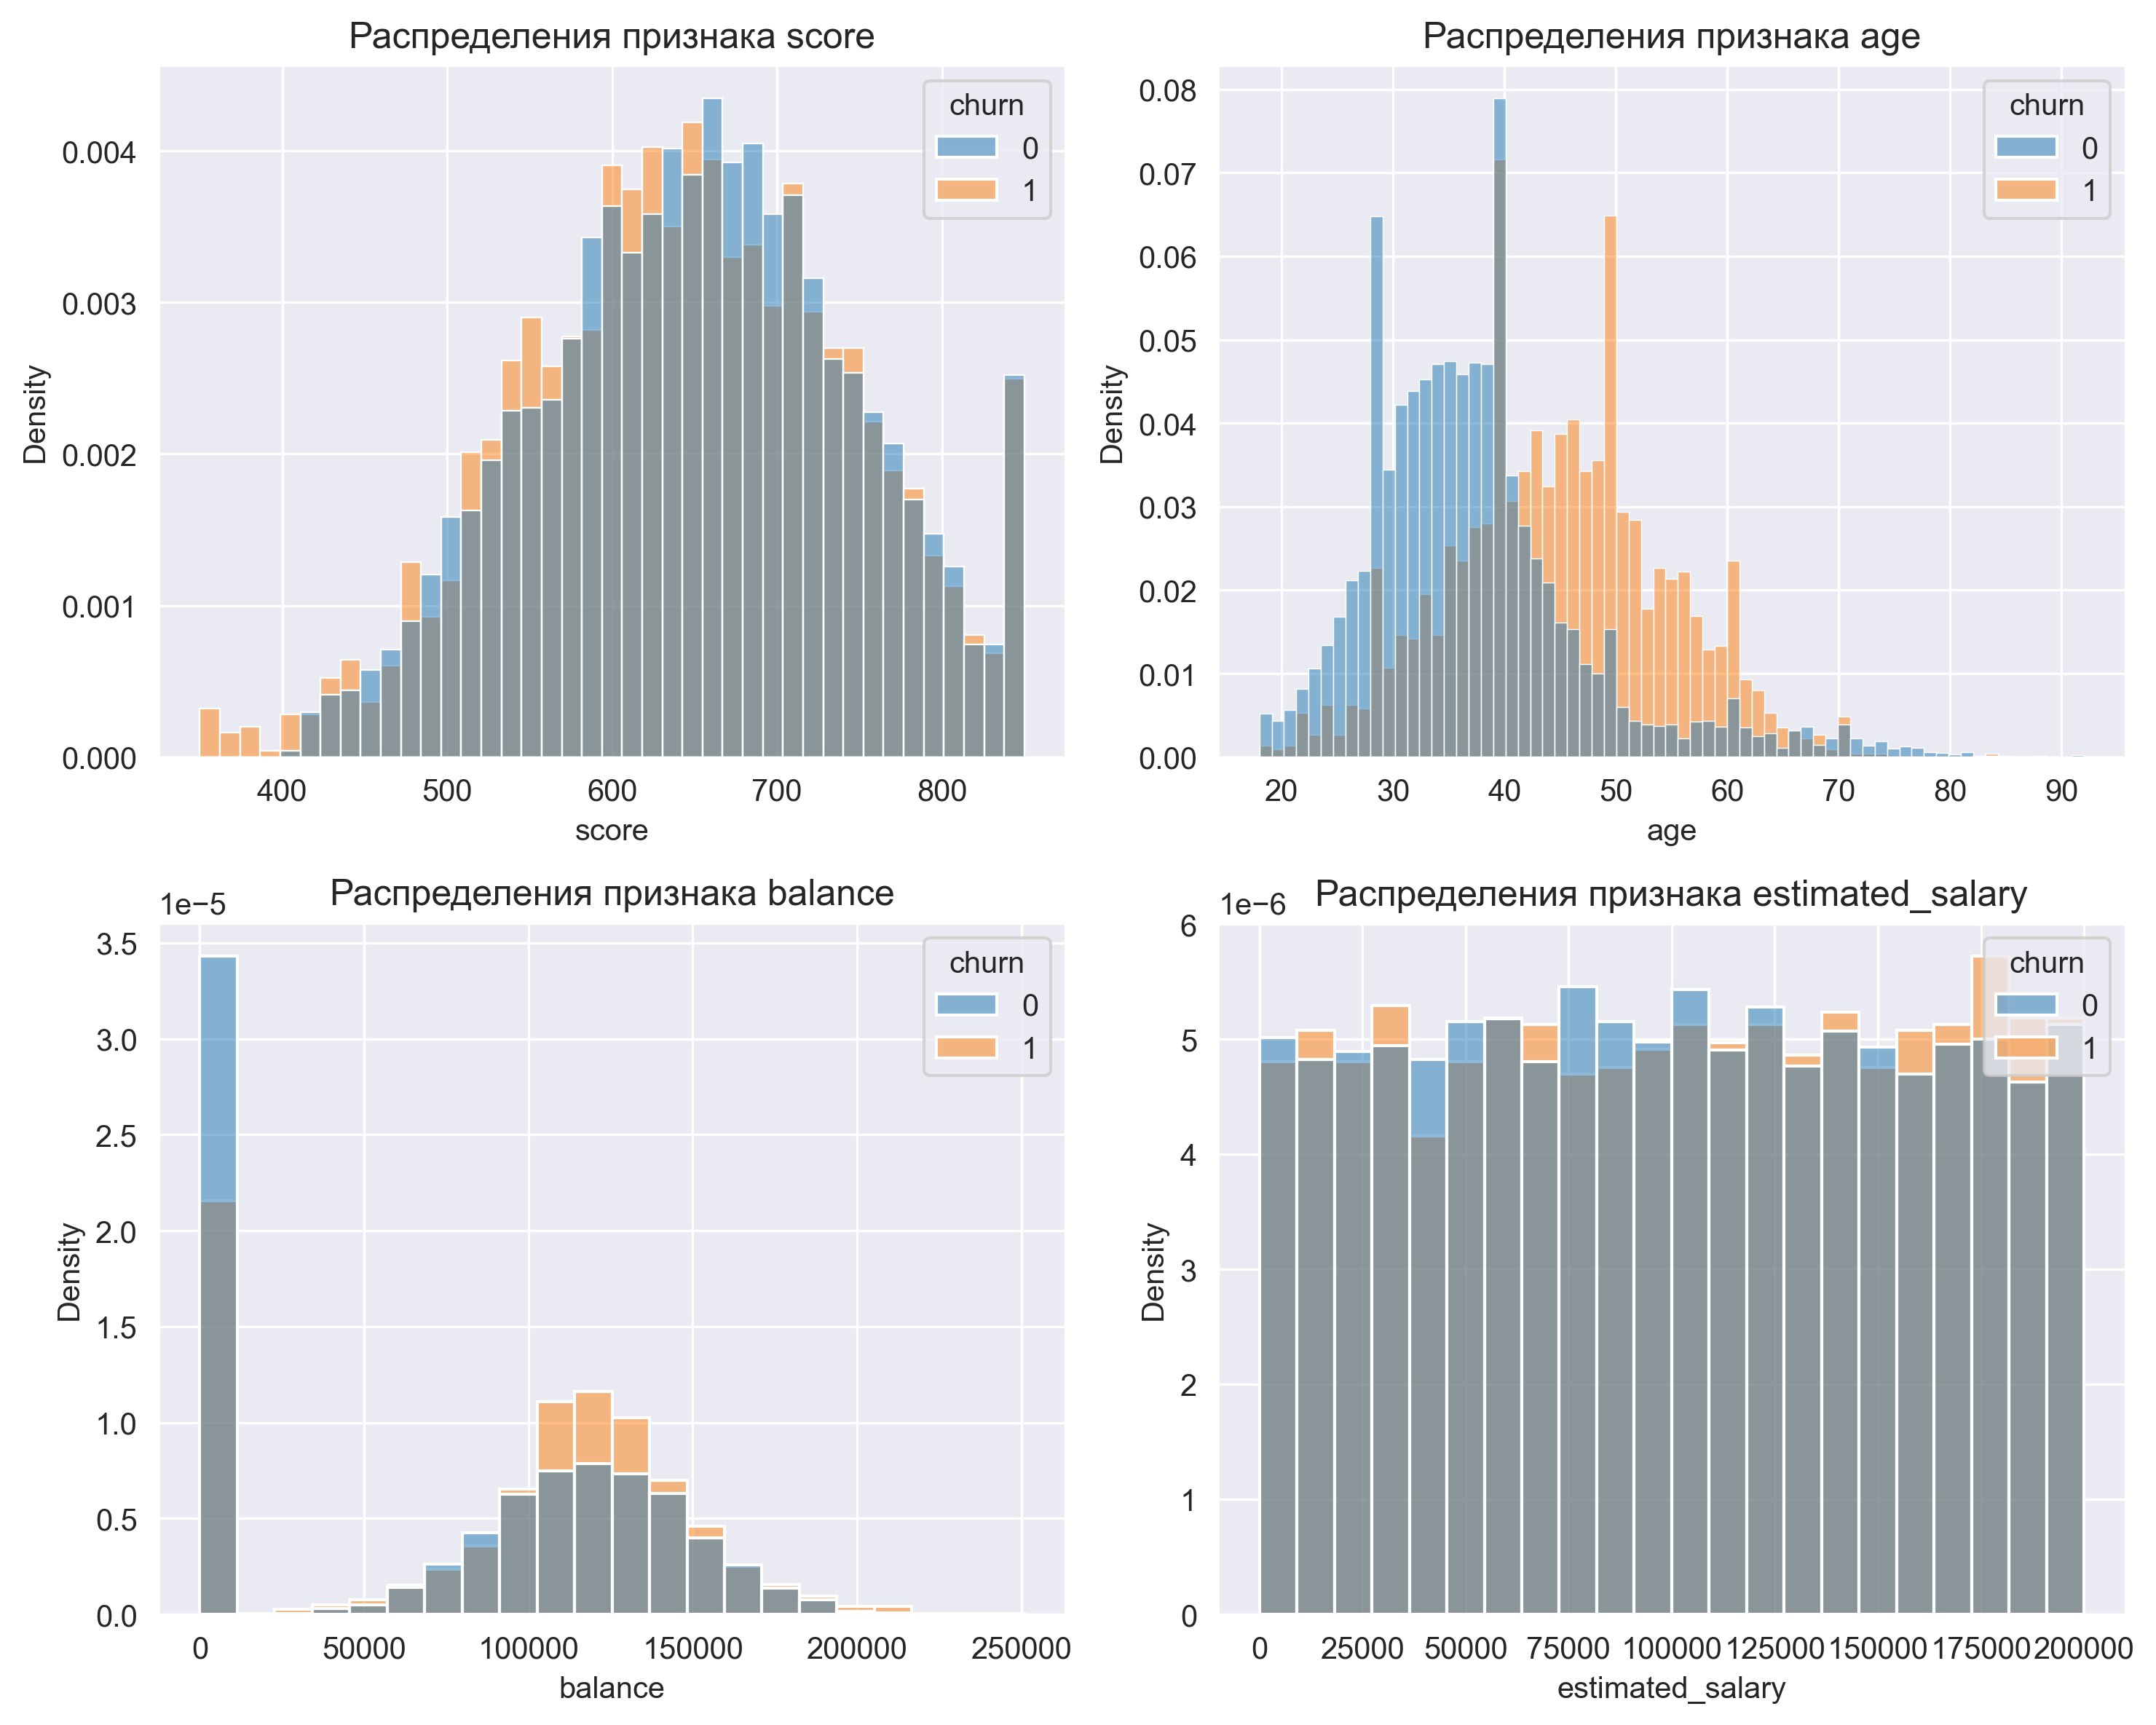

In [30]:
columns_list = ['score', 'age', 'balance', 'estimated_salary']

fig, axs = plt.subplots(len(columns_list) // 2, 2)
fig.set_size_inches(10, 8) 
fig.set_dpi(300)

new_axs = [item for sublist in axs for item in sublist]

for i, column in enumerate(columns_list):
    sns.histplot(data=df, x=column,  stat='density', hue = 'churn', common_norm=False,  ax=new_axs[i])
    new_axs[i].set_title('Распределения признака {}'.format(column))

plt.tight_layout()
plt.show();

Рассмотрев графики распределения количественных признаков, можем дополнить портрет отточного клиента следующими штрихами:
* возраст примерно 42 и выше;
* остаток на балансе выше среднего.

`Вывод`

Резюмируем все вышесказанное и сформулируем портреты отточного и не отточного клиентов.

Чаще всего в отток попадают:
* женщины;
* клиенты в возрасте 44-45 лет и выше;
* лица проживающие в Ростове Великом;
* клиенты с балансом выше 100 тысяч;


Менее склонны к оттоку:
* мужчины;
* клиенты в возрасте до 44 лет;
* клиенты регулярно совершающие активности в приложении банка;
* пользователи двух продуктов банка;


# Статистический анализ по оттоку

## Гипотеза о равенстве дохода

Сформулируем первую гипотезу.

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средний доход отточных и неотточных клиентов равен}\\
   H_1 :\text{Средний доход отточных и неотточных клиентов различается}
 \end{cases}
\end{equation*}$

α=5% критический уровень статистической значимости.

Разделим данные по оттоку и проверим значения дисперсий в получившихся совокупностях.

In [31]:
print (stat.variance(df['estimated_salary']))

3307456784.134512


In [32]:
print (stat.variance(df.query('churn == 1')['estimated_salary']))
print (stat.variance(df.query('churn == 0')['estimated_salary']))

3353848166.8070116
3295401414.9183965


Далее определимся какой статистический тест подойдет лучше для проверки первой гипотезы.
* имеем две генеральные совокупности;
* судя по графику распределения, совокупности распределены равномерно

воспользуемся `ttest, equal_var=False` т.к. дисперсии сопоставимы, но не равны.

In [33]:
df_churn = df.query('churn == 1')['estimated_salary']
df_not_churn = df.query('churn == 0')['estimated_salary']

alpha = 0.05
results = st.ttest_ind(
    df_churn, 
    df_not_churn,
    equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22644042802223346
Не получилось отвергнуть нулевую гипотезу


Нет основания отвергать нулевую гипотезу, считаем, что <b><i>средний доход отточных и неотточных клиентов равен</i> </b>

## Гипотеза о равенстве возраста

Сформулируем вторую гипотезу

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средний возраст отточных и неотточных клиентов равен}\\
   H_1 :\text{Средний возраст отточных и неотточных клиентов различается}
 \end{cases}
\end{equation*}$

α=5% критический уровень статистической значимости.

In [34]:
# проверим значения дисперсий
print (stat.variance(df.query('churn == 1')['age']))
print (stat.variance(df.query('churn == 0')['age']))

95.28808400195595
102.52297408041709


Далее определимся какой статистический тест подойдет лучше для проверки первой гипотезы.
* имеем две генеральные совокупности;
* судя по графику распределения совокупностей близки к нормальным.

воспользуемся `ttest, equal_var=False` т.к. дисперсии сопоставимы, но не равны.

In [35]:
df_churn = df.query('churn == 1')['age']
df_not_churn = df.query('churn == 0')['age']

alpha = 0.05
results = st.ttest_ind(
    df_churn, 
    df_not_churn,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.7127272656641046e-179
Отвергаем нулевую гипотезу


Есть основания отвергнуть нулевую гипотезу, считаем, что <b><i>средний возраст отточных и неотточных клиентов различается</i> </b>

`Вывод`

на данном шаге проверены две гипотезы:
* о равенстве среднего дохода отточных и не отточных клиентов;
* о равенстве среднего возраста отточных и не отточных клиентов.

по итогу можем сказать: 
* средний доход отточных и неотточных клиентов равен;
* средний возраст отточных и неотточных клиентов различается

# Построение модели прогнозирования оттока клиентов

Имеем задачу бинарной классификации. Сильно скоррелированных признаков нет.

<b><font size="3" > Выделение обучающей и валидационной выборок </font></b>

In [36]:
# убираем строковые категориальные данные
df_for_model = df.drop(['city', 'gender'], axis=1)

# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_for_model.drop('churn', axis=1)
y = df_for_model['churn'] 

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<b><font size="3" > Стандартизация данных </font></b>

In [37]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()

#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test) 

<b><font size="3" > Обучение модели на train-выборке: логистической регрессией, случайным лесом, дерево принятия решений</font></b>

In [38]:
# задаем алгоритм для нашей модели, сначала Логистическая регрессия
model_LR = LogisticRegression(solver='liblinear', random_state=0)
# обучение модели
model_LR.fit(X_train_st, y_train)
# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions_LR =  model_LR.predict(X_test_st)
probabilities_LR = model_LR.predict_proba(X_test_st)[:,1]

# случайный лес
model_RF = RandomForestClassifier(random_state=0)
model_RF.fit(X_train_st, y_train)
predictions_RF =  model_RF.predict(X_test_st)
probabilities_RF = model_RF.predict_proba(X_test_st)[:,1]

# дерево принятия решений
tree_model = DecisionTreeClassifier(min_samples_leaf=500)
tree_model.fit(X_train, y_train)
predictions_TM = tree_model.predict(X_test) 


Посмотрим на значения метрик для определения наилучшей модели

In [39]:
print ('Значения метрик для модели логистической регресси')
print ('accuracy = ', round(accuracy_score(y_test, predictions_LR), 2))
print ('precision = ', round(precision_score(y_test, predictions_LR), 2))
print ('recall = ', round(recall_score(y_test, predictions_LR), 2))
print ('F1 = ', round(f1_score(y_test, predictions_LR), 2))

Значения метрик для модели логистической регресси
accuracy =  0.81
precision =  0.59
recall =  0.24
F1 =  0.34


In [40]:
print ('Значения метрик для модели случайный лес')
print ('accuracy = ', round(accuracy_score(y_test, predictions_RF), 2))
print ('precision = ', round(precision_score(y_test, predictions_RF), 2))
print ('recall = ', round(recall_score(y_test, predictions_RF), 2))
print ('F1 = ', round(f1_score(y_test, predictions_RF), 2))

Значения метрик для модели случайный лес
accuracy =  0.87
precision =  0.75
recall =  0.52
F1 =  0.62


In [41]:
print ('Значения метрик для модели дерево решений')
print ('accuracy = ', round(accuracy_score(y_test, predictions_TM), 2))
print ('precision = ', round(precision_score(y_test, predictions_TM), 2))
print ('recall = ', round(recall_score(y_test, predictions_TM), 2))
print ('F1 = ', round(f1_score(y_test, predictions_TM), 2))

Значения метрик для модели дерево решений
accuracy =  0.83
precision =  0.78
recall =  0.25
F1 =  0.38


Основной метрикой будем считать F1. т.к. метрика полноты accuracy хорошо работает только при условии баланса классов — когда объектов каждого класса примерно поровну, 50% : 50%. Метрики precision и recall направлены на избежание противоположных рисков, нужна сводная метрика, учитывающая баланс между метриками. Это F1-score.

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;👍<br>
Очень круто!
</div>

Таким образом лучшей моделью в нашем случае считаем `Случайный лес` со значениями F1 = 0,62, неплохим значением Точности (precision) = 0.75, и полнотой (recall) хотя бы чуть больше чем 0.5.

Случайный лес - это сводный алгоритм состоит из множества деревьев. Визуализируем одно из возможных деревьев на полученной ранее модели дерева принятия решений.

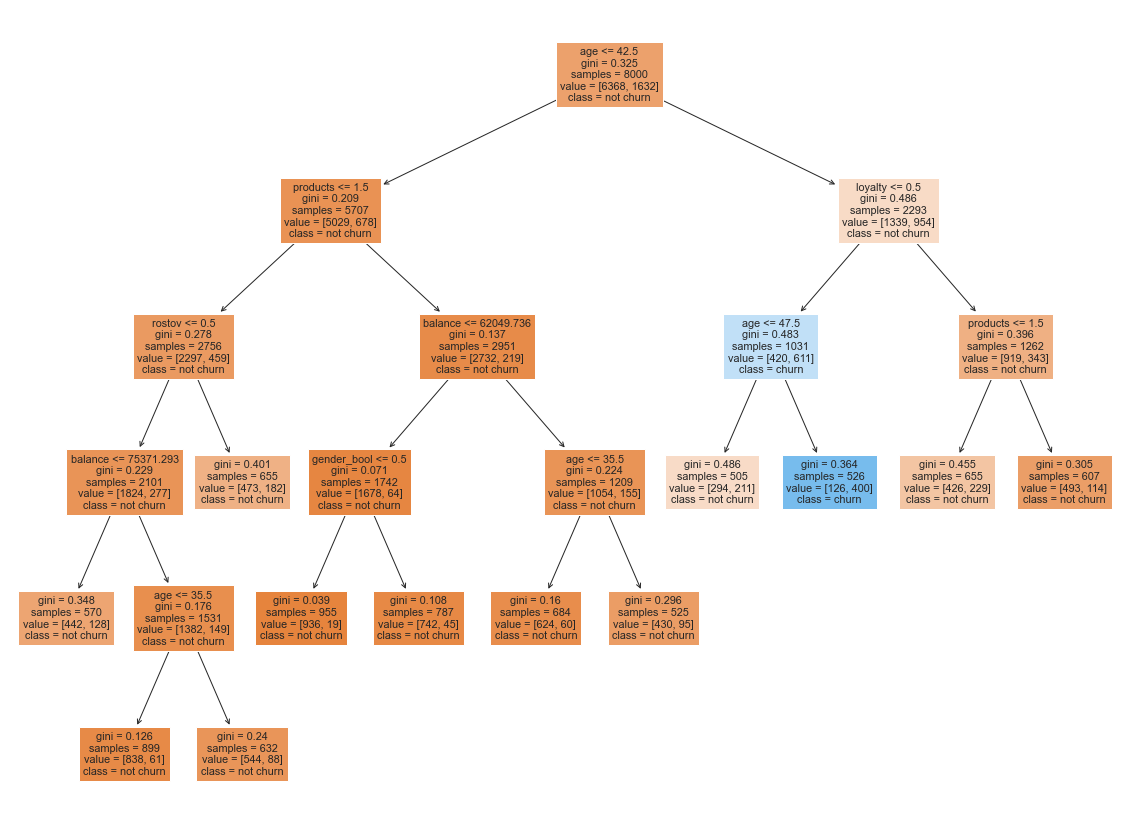

In [42]:
plt.figure(figsize = (20,15)) # задайте размер фигуры, чтобы получить крупное изображение
plot_tree(tree_model, filled=True, feature_names = X_train.columns, class_names = ['not churn', 'churn'])
plt.show() 

F1 =  0.52


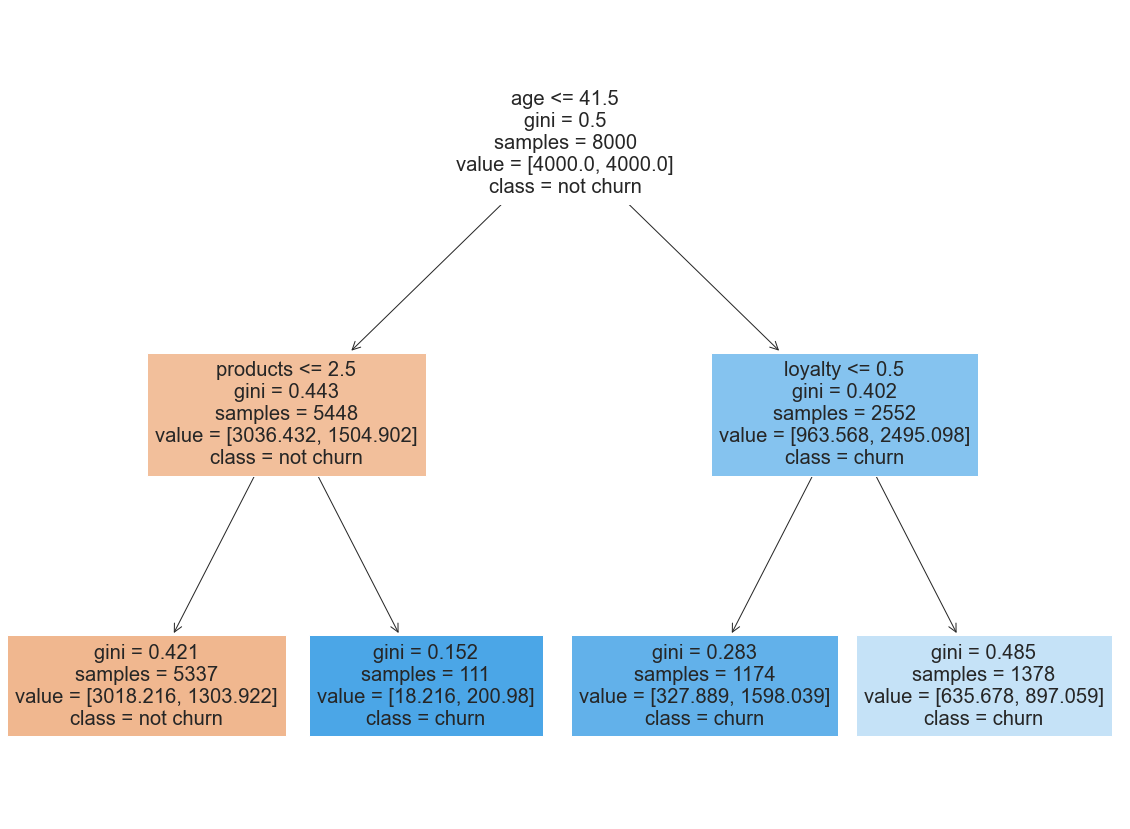

In [43]:


tree_model_2 = DecisionTreeClassifier(class_weight = "balanced",max_depth=2)
tree_model_2.fit(X_train, y_train)
predictions = tree_model_2.predict(X_test) 
print ('F1 = ', round(f1_score(y_test, predictions), 2))

plt.figure(figsize = (20,15))
plot_tree(tree_model_2, filled=True, feature_names = X_train.columns, class_names = ['not churn', 'churn'])
plt.show() 

In [44]:
### КОД РЕВЬЮЕРА
pd.DataFrame((model_RF.feature_importances_, model_LR.coef_[0]),
    index=['RF','LR'],
    columns = X.columns).T

,RF,LR
score,0.14,-0.07
age,0.24,0.75
objects,0.08,-0.08
balance,0.15,0.14
products,0.13,-0.14
creditcard,0.02,-0.02
loyalty,0.04,-0.52
estimated_salary,0.15,0.03
yaroslavl,0.01,-0.14
rybinsk,0.01,-0.07


`Вывод`

На данном шаге построили несколько моделей прогнозирования оттока клиентов, по совокупности метрик лучшей считаем `Случайный лес`


# Кластеризация

На данном шаге проведем кластеризацию клиентов с помощью `KMeans` и посмотрим, что нам это даст.


In [45]:
X = df_for_model.drop(['churn'], axis=1)

# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# в переменной linked сохранена таблица «связок» между объектами, её можно визуализировать как дендрограмму
linked = linkage(X_sc, method = 'ward') 

In [46]:
#X.head()

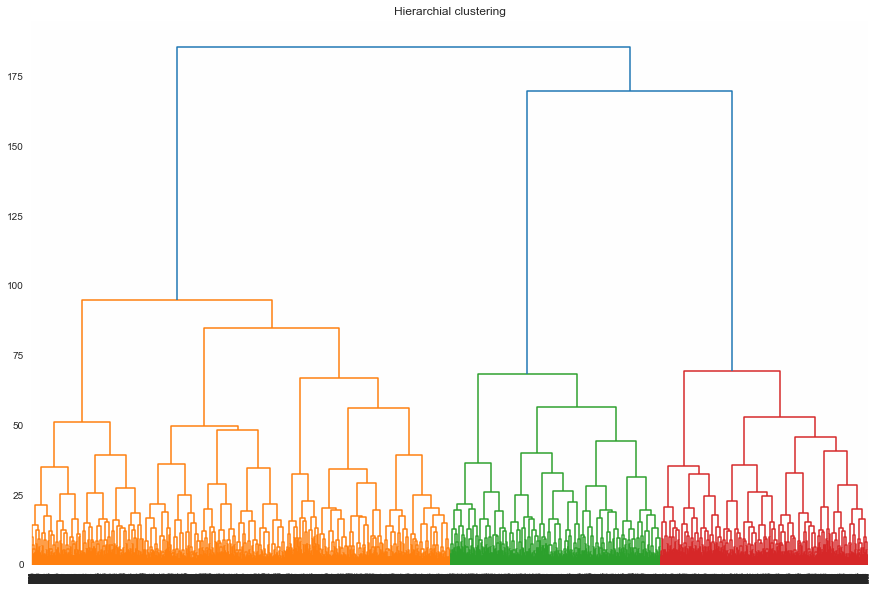

In [47]:
# строим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

Количество кластеров определим равное трем.

In [48]:
km = KMeans(n_clusters=3, random_state=0) # задаём число кластеров, равное 3, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc)

In [49]:
# добавляем в исходные данные метки с номерами кластеров
df['cluster_km'] = labels
#df.head()

Посмотрим средние значения параметров по кластерам.

In [50]:
round (df.groupby('cluster_km').mean().T, 2)

cluster_km,0,1,2
score,649.67,651.45,651.33
age,38.51,39.77,38.89
objects,5.00,5.01,5.03
balance,62092.64,119730.12,61818.15
products,1.53,1.51,1.54
creditcard,0.71,0.71,0.69
loyalty,0.52,0.50,0.53
estimated_salary,99899.18,101113.44,99440.57
churn,0.16,0.32,0.17
yaroslavl,1.00,0.00,0.00


Количество записей в каждом кластере.

In [51]:
df.groupby('cluster_km')['gender'].count()

cluster_km
0    5014
1    2509
2    2477
Name: gender, dtype: int64

Оценим качетство проведенной кластеризации

In [52]:
print('Silhouette_score: = ', silhouette_score(X_sc, labels))

Silhouette_score: =  0.20231972422910172


Получаем `Silhouette_score` на уровне около 0.2. Могло бы быть и лучше.

`Вывод`

Ожидаемо в кластер с самым высоким оттоком попали клиенты 

* чуть старше чем в остальных кластерах;
* со значительно более высоким балансом;
* чуть менее активно использующие приложение.

все это не противоречит ранее сделанным наблюдениям, что уже хорошо, но и какой - то существенно новой информации не дает.





# Сегментация

Итак, к стратегически важным можем отнесте следующие параметры: `gender`, `age`, `city`, `balance`, `products`
Посмотрим доли килентов с потенциально опасным значением данных признаков от общего числа клиентов.

In [53]:
print ('Женщины', df.query("gender == 'Ж'").shape[0]/df.shape[0]*100, '%')
print ('Возраст больше 42', round(df.query("age>42").shape[0]/df.shape[0]*100,2), '%')
print ('Ростов Великий', round(df.query("city == 'Ростов Великий'").shape[0]/df.shape[0]*100,2), '%')
print ('Высокий баланс', round(df.query("balance>100000").shape[0]/df.shape[0]*100,2), '%')
print ('Пользователи 1, 3 или 4 продуктов', round(df.query("products != 2").shape[0]/df.shape[0]*100,2), '%')

Женщины 45.43 %
Возраст больше 42 28.94 %
Ростов Великий 25.09 %
Высокий баланс 47.99 %
Пользователи 1, 3 или 4 продуктов 54.1 %


Да имеем огромные доли вплоть до половины датасета.
Посчитаем долю оттока в каждой из этих групп.

churn
0   0.80
1   0.20
Name: churn, dtype: float64

,name,size,avg_churn
0,женщины,4543,0.25
1,старше 42,2894,0.42
2,из Ростова,2509,0.32
3,высокий баланс,4799,0.25
4,не 2 продукта,5410,0.31


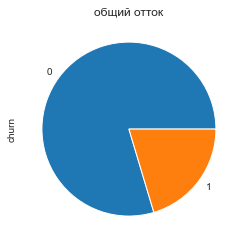

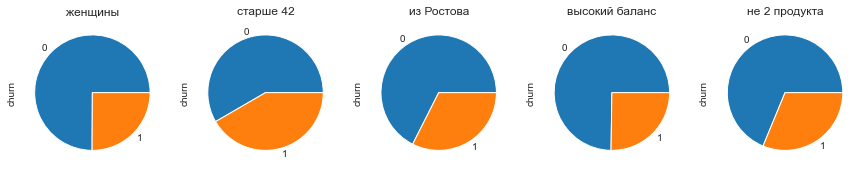

In [54]:
df_gender = df.query("gender == 'Ж'")
df_age = df.query("age>42")
df_city = df.query("city == 'Ростов Великий'")
df_balance = df.query("balance>100000")
df_products = df.query("products != 2")

part_churn = df.groupby('churn')['churn'].count() / df.shape[0]
display (part_churn)


part_churn.plot(kind = 'pie').set(title = 'общий отток')
values = [df_gender, df_age, df_city, df_balance, df_products]
title_list = ['женщины', 'старше 42', 'из Ростова', 'высокий баланс', 'не 2 продукта']
fig, axs = plt.subplots(1, len(values), sharey = False, figsize = (15,5))

for i, value in enumerate(values):
    part_churn = value.groupby('churn')['churn'].count() / value.query("churn==1")['age'].count()
    part_churn.plot(kind = 'pie', ax=axs[i]).set(title = title_list[i]) 
    
df_segment = pd.DataFrame()
df_segment['name'] = title_list
df_segment['size'] = 0
df_segment['avg_churn'] = 0.0
for i, value in enumerate(values):
    df_segment['size'][i] = value.shape[0]
    df_segment['avg_churn'][i] =  value.query("churn==1").shape[0] / value.shape[0]
    
df_segment

Во всех группах довольно высокий отток, выше общего по данным. Схожи по доле оттока сегменты: Женщины и высокий баланс, Ростов Великий и не 2 продукта. Объединим их в один сегмент. 

,index,name,size,avg_churn
0,1,Ростов не 2 продукта,1469,0.47
1,2,старше 42,2894,0.42
2,0,женщины c высоким балансом,2148,0.30


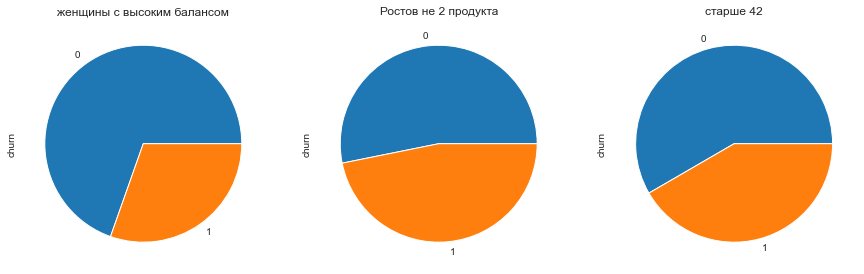

In [55]:
df_gender_balance =  df.query("gender == 'Ж' & balance>100000")
df_city_products = df.query("city == 'Ростов Великий' & products!= 2")

values = [df_gender_balance, df_city_products, df_age]
title_list = ['женщины c высоким балансом', 'Ростов не 2 продукта', 'старше 42']

fig, axs = plt.subplots(1, len(values), sharey = False, figsize = (15,5))
for i, value in enumerate(values):
    part_churn = value.groupby('churn')['churn'].count() / value.query("churn==1")['churn'].count()
    part_churn.plot(kind = 'pie', ax=axs[i]).set(title = title_list[i]) 
    
values = [df_gender_balance, df_city_products, df_age]
df_segment = pd.DataFrame()
df_segment['name'] = title_list
df_segment['size'] = 0
df_segment['avg_churn'] = 0.0
for i, value in enumerate(values):
    df_segment['size'][i] = value.shape[0]
    df_segment['avg_churn'][i] =  value.query("churn==1").shape[0] / value.shape[0]
    
df_segment.sort_values('avg_churn', ascending = False).reset_index()

Имеем три сегмента с крайне высоким оттоком

* клиенты из Ростова Великого использующие 1 продукт (доля клиентов с 3-4 продуктами крайне не велика, скорее всего здесь речь именно об одном продукте;
* клиенты старше 42 лет;
* женщины с балансом выше 100 000.

Размеры сегментов от 1496 до 2148 человек с долей оттока от 30 до 47% т.е. достоточно крупные и высокоотчные.




`Вывод`

Рекомендации по работе с сегментами можно дать следующие:

* клиентам из Ростова Великого (предварительно убедившись, что их устраивает качество обслуживания и отработав возможные возражения / негатив) предложить оформить второй продукт, продуктом должно быть что - то популярное и соответствующее их потребностям (выявленными менеджером) скорее всего вклад или КК (если нет);


* клиенты старше 42 лет сокрее всего имеют детей-подростков, автомобиль, дом/квартиру под все это подходит ряд программ страхования, предложение которых будет релевантно;


* женщинам с балансом выше 100 000 целесообразно дополнительно оформить вклад с более привлекательными условиями



# Вывод

В данной работе были проанализированы данные о клиентах банка "Метанпром".

<b> Построены модели прогнозирования оттока клиентов: </b>

    * логистическая регрессия;
    * случайный лес;
    * дерево принятия решений.
    
Основываясь на показаниях ключевых метрик оценки моделей `accurancy, precision, recall, F1` можно сказать, что обе модели хорошо показывает себя в прогнозировании оттока. По совокупности чуть лучше показывает себя модель `случайный лес`.

<b> Выделены основные черты клиентов склонных к оттоку </b>

* женщины;
* клиенты в возрасте 44-45 лет и выше;
* лица проживающие в Ростове Великом;
* клиенты с балансом выше 100 тысяч.

и более надежных:

* мужчины;
* клиенты в возрасте до 44 лет;
* клиенты регулярно совершающие активности в приложении банка;
* пользователи двух продуктов банка.



<b> Проверены две статистические гипотезы </b>

Можно утверждать, что:
* средний доход отточных и неотточных клиентов равен;
* средний возраст отточных и неотточных клиентов различается

<b> Проведена кластеризация </b>

Использовался метод `KMeans`, выделено три кластера. 
Качество проведенной кластеризации не высокое `Silhouette_score`= 0,2, однако средние значения характеристик по кластерам не противоречат и подтверждают сделанные ранее выводы о портретах клиентов.

<b> Общие рекомендации отделу маркетинга: </b>




<b> 1 -  необходимы активности направленные на отточных клиентов, в частности: </b>

* провести проверку качества обслуживания клиентов и состояния офисов в г. Ростов Великий, например методом аудита "тайный клиент", чтобы выявить возможные отклонения от стандартов обслуживания в этом городе;


* сформировать ряд акционных предложений, которые были бы интересны женщинам среднего возраста, например типичные вещи полезные им:
    * скидки в косметических салонах;
    * скидки магазинах одежды; 
    * скидки на определенные виды товаров в продуктовых магазинах.
    
Здесь требуется проработка партнерских программ и экономической целесообразности.    
    
    
* уделить внимание клиентам с балансом выше 100 тысяч, например дополнительные бонусы в виде процента на остаток при поддержании заданного баланса.

<b> 2 - уделить внимание контролю качества, удовлетворенности от использования продуктов у потенциально отточных клиентов</b>

Обратная связь - это очень важно в любом бизнесе, а особенно в банковском/ 

* организовать сбор обратной связи удовлетворенности клиентов из зоны риска.
    * требуется проработка скрипта для обзвона, собирающий информацию о удовлетворенности от использования и пожеланий клиентов, это позволит оптимизировать действующие и разработать новые продукты.


<b> 3 -  увеличивать число клиентов, у которых будут соблюдаться маркеры характеризующие слабый отток</b>:

* добавить в приложение банка опции, заставляющие клиента регулярно заходить в приложение и совершать какие - либо действия. 
    * бонусные игры, со сбором фишек/рыбок, которые можно в дальнейшем обменивать на скидки и/или льготное оформление второго продукта. 
    

* клиентам пользующимся одним продуктом банка постараться продать еще один продукт, как показали графики клиенты с двумя продуктами менее склонны к оттоку, предложения по второму продукты должны учитывать потребности клиентов, выявленные при обзвоне;






<b> Рекомендации отделу маркетинга по работе с наиболее проблемными сегментами </b>

Первоочередное воздействие необходимо на группу старше 42 лет либо "Ростов не 2 продукта"

* клиентам из Ростова Великого c одним продуктом предложить оформить второй продукт, продуктом должно быть что - то популярное и соответствующее их потребностям (выявленными менеджером) скорее всего вклад или КК (если нет)
        *предварительно убедившись, что их устраивает качество обслуживания и отработав возможные возражения / негатив;


* клиенты старше 42 лет сокрее всего имеют детей-подростков, автомобиль, дом/квартиру под все это подходит ряд программ страхования, предложение которых будет релевантно;


* женщинам с балансом выше 100 000 целесообразно дополнительно оформить вклад с более привлекательными условиями
    

<b><i> Реализация всех вышеописанных рекомендаций требует тщательной проработки профильными подразделениями банка </i></b>